<a href="https://colab.research.google.com/github/MonishSoundarRaj/colab_files_1/blob/main/final_plots_for_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn
import pandas as pd
from datetime import datetime
from collections import Counter, defaultdict
import json
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
bw_df = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_blue_waters.csv")
mira_df_2 = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_mira.csv")
hl_df = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_helios.csv")
philly_df = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_philly.csv")
sc_df = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_supercloud.csv")
th_df = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_theta.csv")
th_gpu_df = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_thetagpu.csv")


In [3]:
columns=["job", "user", "project", "state", "gpu_num", "cpu_num", "node_num", "submit_time", "wait_time", "run_time", "wall_time", "node_hour"]

In [4]:
def date2stamp(d):
    return datetime.strptime(d, '%Y-%m-%d %H:%M:%S').timestamp()
def date2stamp2(d):
    return datetime.strptime(d, '%Y-%m-%d %I:%M:%S %p').timestamp()

In [5]:
def plot_cdf(x, bins, xlabel, ylabel="Frequency (%)", color="", linestyle="--"):
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        x = np.sort(x)
        cdf = 100 * np.arange(len(x)) / float(len(x))
        if color:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5, color=color)
        else:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.margins(0)
        plt.ylim(0, 100)
        plt.xlim(10**0, 10**8)
        plt.grid(True)
        plt.style.use("default")

In [12]:
import matplotlib.font_manager
fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
for font in fonts:
    font_properties = matplotlib.font_manager.FontProperties(fname=font)
    print(font_properties.get_name())

Liberation Sans Narrow
Liberation Sans
Liberation Sans
Liberation Mono
Liberation Mono
Liberation Mono
Liberation Serif
Liberation Serif
Liberation Mono
Liberation Serif
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Sans
Liberation Sans Narrow
Humor Sans
Liberation Serif
Liberation Sans


# JFC - Correlation between Job Failure and Job Geometries


In [ ]:
def calc_status_over(data, a, b,status=["Pass", "Failed", "Killed"], col="run_time", col2="state"):
    data = data.copy()
    data = data[data[col]!=0]
    data_a = data[data[col]<=a]
    data_b = data[(data[col]>a) & (data[col]<=b)]
    data_c = data[data[col]>b]
    qs = [[] for _ in range(3)]
    for index, d in enumerate([data_a, data_b, data_c]):
        q = d[col2].value_counts(normalize=True) * 100
        for i in status:
            if i not in q:
                qs[index].append(0)
            else:
                qs[index].append(q[i])
    return qs

In [ ]:
calc_status_over(bw_df, 22636*32//10, 3*22636*32//10, col2="new_status")

[[65.66096349815254, 8.344960445405246, 25.994076056442207],
 [61.7576342432817, 2.551562832234744, 35.690802924483556],
 [0, 0, 0]]

In [ ]:
calc_status_over(mira_df_2, 49152*16//10, 3*49152*16//10, col2="new_status")

[[70.23330651649235, 8.965763833020471, 20.800929650487173],
 [40.298507462686565, 0.7462686567164178, 58.95522388059702],
 [0, 0, 0]]

In [ ]:
calc_status_over(philly_df, 1, 8, col="gpu_num")

[[67.6981199964019, 24.18899801287136, 8.112881990726734],
 [26.483950799689726, 58.283160344254426, 15.232888856055848],
 [20.27687296416938, 63.27361563517915, 16.449511400651463]]

In [ ]:
calc_status_over(hl_df, 1, 8, col="gpu_num")

[[57.48994568597371, 21.9826692648949, 20.527385049131393],
 [45.79295637720701, 22.9936964907329, 31.213347132060086],
 [36.688236653570605, 13.173099144904091, 50.13866420152531]]

In [ ]:
calc_status_over(sc_df, 32000//10, 3*32000//10, col2="new_status")

[[93.44890531638681, 1.395707434324652, 5.155387249288541],
 [93.69253042219353, 1.9877137379191612, 4.319755839887311],
 [92.92871998487426, 1.3840045377197958, 5.687275477405937]]

In [ ]:
calc_status_over(th_df, 281088//10, 3*281088//10, col2="new_status")

[[62.583136665951514, 8.331545448044054, 29.085317886004436],
 [43.290043290043286, 6.926406926406926, 49.78354978354979],
 [50.625, 1.875, 47.5]]

In [ ]:
calc_status_over(th_gpu_df, 1, 8, col="gpu_num", col2="new_status")

[[22.512866769247093, 53.446171804531225, 24.04096142622168],
 [34.30376270255424, 65.14693765449053, 0.549299642955232],
 [27.11864406779661, 72.88135593220339, 0]]

# Split


In [ ]:
calc_status_over(bw_df, 3600, 3600*24, col2="new_status")

[[77.38959920341603, 10.274344986835594, 12.336055809748379],
 [53.084873994352385, 5.706217699397944, 41.20890830624967],
 [59.617663499161544, 2.222470653996646, 38.15986584684181]]

In [ ]:
calc_status_over(mira_df_2, 3600, 3600*24, col2="new_status")

[[76.86672302056917, 15.995115995115993, 7.13816098431483],
 [64.34694050751082, 2.5799881184757703, 33.07307137401341],
 [2.564102564102564, 0, 97.43589743589743]]

In [ ]:
calc_status_over(philly_df, 3600, 3600*24,)
print((philly_df["state"] == "Pass").sum())
print((philly_df["state"] == "Killed").sum())
print((philly_df["state"] == "Failed").sum())


90454
14449
46913


In [ ]:
calc_status_over(hl_df, 3600, 3600*24, )
print((hl_df["state"] == "Pass").sum())
print((hl_df["state"] == "Killed").sum())
print((hl_df["state"] == "Failed").sum())

105734
34558
23067


In [ ]:
calc_status_over(sc_df, 3600, 3600*24, col2="new_status")

[[93.47785725987004, 1.4372303827881832, 5.0849123573417785],
 [93.48346984479977, 1.5457378666624904, 4.970792288537735],
 [91.12041325258284, 1.4962593516209477, 7.383327395796224]]

In [ ]:
calc_status_over(th_df, 3600, 3600*24, col2="new_status")

[[69.79630808402291, 11.903246339910885, 18.3004455760662],
 [48.276569552728766, 1.2105047189167009, 50.51292572835453],
 [0, 4.054054054054054, 95.94594594594594]]

In [ ]:
calc_status_over(th_gpu_df, 3600, 3600*24, col2="new_status")
# print((th_gpu_df["new_status"] == "Pass").sum())
# print((th_gpu_df["new_status"] == "Killed").sum())
# print((th_gpu_df["new_status"] == "Failed").sum())

[[25.809303590859628, 46.78318824809576, 27.407508161044614],
 [21.88330591064422, 71.52259207695228, 6.594102012403494],
 [0, 100.0, 0]]

In [53]:
from matplotlib.font_manager import FontProperties
plt.rcParams['font.family'] = 'Liberation Sans'
font_properties = FontProperties(family='Liberation Sans', size=19)


# Check 1

(67.00871394770195, 70.73658165207462, 62.583136665951514, 67.6981199964019, 57.48994568597371) (7.114774934564608, 8.288922725542443, 8.331545448044054, 24.18899801287136, 21.9826692648949) (25.876511117733443, 20.974495622382946, 29.085317886004436, 8.112881990726734, 20.527385049131393)
(47.096774193548384, 58.49765258215962, 43.290043290043286, 26.483950799689726, 45.79295637720701) (1.2903225806451613, 19.342723004694836, 6.926406926406926, 58.283160344254426, 22.9936964907329) (51.61290322580645, 22.15962441314554, 49.78354978354979, 15.232888856055848, 31.213347132060086)
(67.36842105263158, 65.33957845433255, 50.625, 20.27687296416938, 36.688236653570605) (4.2105263157894735, 13.817330210772832, 1.875, 63.27361563517915, 13.173099144904091) (28.421052631578945, 20.843091334894616, 47.5, 16.449511400651463, 50.13866420152531)


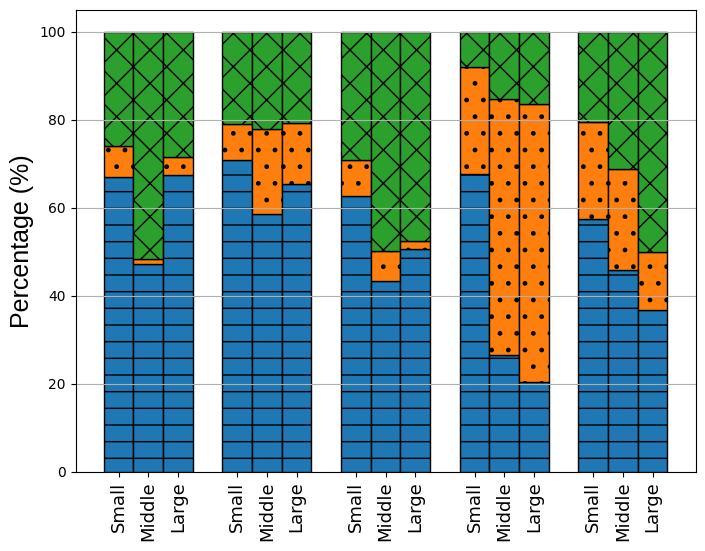

(77.38959920341603, 76.86672302056917, 69.79630808402291, 60.49915507604315, 65.05428807036834) (10.274344986835594, 15.995115995115993, 11.903246339910885, 32.72672126175311, 15.161489829576691) (12.336055809748379, 7.13816098431483, 18.3004455760662, 6.774123662203735, 19.784222100054976)
(53.084873994352385, 64.34694050751082, 48.276569552728766, 60.98551323079041, 64.9508786495088) (5.706217699397944, 2.5799881184757703, 1.2105047189167009, 22.593854306458827, 4.849868548498685) (41.20890830624967, 33.07307137401341, 50.51292572835453, 16.420632462750763, 30.199252801992525)
(59.617663499161544, 2.564102564102564, 0, 39.69247516668935, 49.60118168389956) (2.222470653996646, 0, 4.054054054054054, 35.07960266702953, 8.951255539143279) (38.15986584684181, 97.43589743589743, 95.94594594594594, 25.227922166281125, 41.44756277695716)


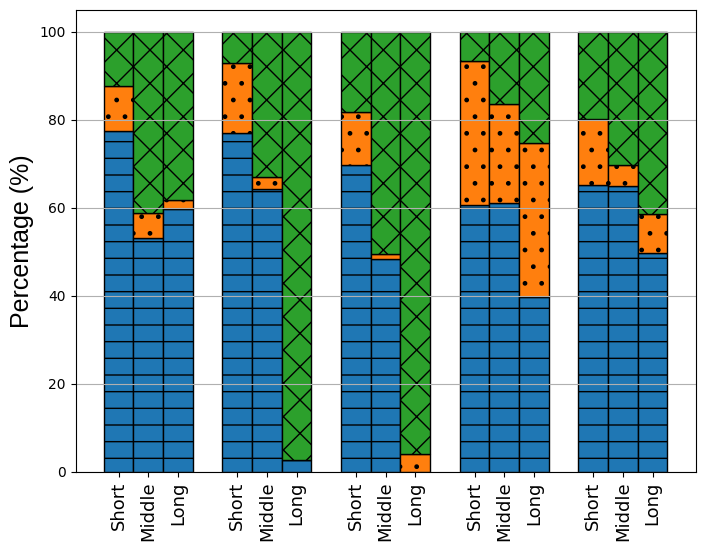

In [49]:
def plot_status_over(run_time=False):
    plt.style.use("default")
    traces = ("BW", "Mira", "Theta", "Philly", "Helios")
    if run_time:
        bw = [[77.38959920341603, 10.274344986835594, 12.336055809748379],
 [53.084873994352385, 5.706217699397944, 41.20890830624967],
 [59.617663499161544, 2.222470653996646, 38.15986584684181]]
        mira = [[76.86672302056917, 15.995115995115993, 7.13816098431483],
 [64.34694050751082, 2.5799881184757703, 33.07307137401341],
 [2.564102564102564, 0, 97.43589743589743]]
        th = [[69.79630808402291, 11.903246339910885, 18.3004455760662],
 [48.276569552728766, 1.2105047189167009, 50.51292572835453],
 [0, 4.054054054054054, 95.94594594594594]]
        philly = [[60.49915507604315, 32.72672126175311, 6.774123662203735],
 [60.98551323079041, 22.593854306458827, 16.420632462750763],
 [39.69247516668935, 35.07960266702953, 25.227922166281125]]
        hl = [[65.05428807036834, 15.161489829576691, 19.784222100054976],
 [64.9508786495088, 4.849868548498685, 30.199252801992525],
 [49.60118168389956, 8.951255539143279, 41.44756277695716]]

        z = ["","",""]

        z = ["Short","Middle","Long"]

    else:
        bw = [[67.00871394770195, 7.114774934564608, 25.876511117733443],
     [47.096774193548384, 1.2903225806451613, 51.61290322580645],
     [67.36842105263158, 4.2105263157894735, 28.421052631578945]]

        mira = [[70.73658165207462, 8.288922725542443, 20.974495622382946],
     [58.49765258215962, 19.342723004694836, 22.15962441314554],
     [65.33957845433255, 13.817330210772832, 20.843091334894616]]

        th = [[62.583136665951514, 8.331545448044054, 29.085317886004436],
      [43.290043290043286, 6.926406926406926, 49.78354978354979],
      [50.625, 1.875, 47.5]]

        philly = [[67.6981199964019, 24.18899801287136, 8.112881990726734],
     [26.483950799689726, 58.283160344254426, 15.232888856055848],
     [20.27687296416938, 63.27361563517915, 16.449511400651463]]

        hl = [[57.48994568597371, 21.9826692648949, 20.527385049131393],
     [45.79295637720701, 22.9936964907329, 31.213347132060086],
     [36.688236653570605, 13.173099144904091, 50.13866420152531]]


        # z = ["","",""]

        z = ["Small","Middle","Large"]
        status = {
            'Small': (15.61, 12.22, 3.34, 5.68, 0.3),
            'Middle': (143.62, 50.96, 28.20, 15.84, 0.4),
            # here theta has changed to 153.07 -> 66.07 -> 189.70
            'Large': (53.33, 42.83, 189.70, 13.26, 0.53),
        }

    x = np.arange(len(traces))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(figsize=(8,6))
    hatches= ["-", ".", "x", "-", '--', "o"]
    colors=['#1f77b4', '#ff7f0e', '#2ca02c']
    for i, (measurement) in enumerate(zip(bw, mira, th, philly, hl)):
        offset = width * multiplier
        prev = np.array([0.0]*5)
        print(*zip(*measurement))
        for k, j in enumerate(zip(*measurement)):
            rects = ax.bar(x + offset, j, width, hatch=hatches[k], color=colors[k], edgecolor='black', bottom=prev)
            prev += np.array(j)
        multiplier += 1

    ax.set_ylabel('Percentage (%)', fontproperties=font_properties)
    ax.set_xticks(np.delete(np.arange(19) * 0.25, [3, 7, 11, 15]), 5 * z, fontsize=13, rotation=90)
    plt.grid(axis="y")
    plt.show()

plot_status_over()
plot_status_over(True)

# UBC - Users' Repeated Behaviour


In [ ]:
from collections import defaultdict
from bisect import bisect
def plot_groups(data, col):
    d = {}
    g = {}
    for index, row in data.iterrows():
        if row["user"] not in d:
            d[row["user"]] = defaultdict(list)
            g[row["user"]] = defaultdict(list)
        d[row["user"]][row[col]].append([row["run_time"], row[col]*row["run_time"]])

    for i in d:
        for j in d[i]:
            d[i][j].sort()
            for k in range(1, len(d[i][j])):
                d[i][j][k][1] += d[i][j][k-1][1]
            index = 0
            while index < len(d[i][j]):
                new_index = bisect(d[i][j], [d[i][j][index][0]*1.2, 0])
                if index >= 1:
                    g[i][j].append([d[i][j][index], d[i][j][new_index-1][1]-d[i][j][index-1][1]])
                else:
                    g[i][j].append([d[i][j][index], d[i][j][new_index-1][1]])
                index = new_index
    s = 0
    a = [0]*10
    for i in g:
        t = 0
        for j in g[i]:
            g[i][j].sort(key=lambda x:-x[1])
            t += len(g[i][j])
            for k in range(10):
                if k < len(g[i][j]):
                    a[k] += g[i][j][k][1]
        s += t
    for i in range(1, 10):
        a[i] += a[i-1]
    print(list(np.array(a)/(data[col]*data["run_time"]).sum()))
#         print(i, t)
    print(s/len(g), len(data)/len(set(data["user"])))

In [ ]:
plot_groups(mira_df_2, "cpu_num")

[0.6918350088912488, 0.8533482445948762, 0.921081711512026, 0.9533918131448507, 0.9710197995695022, 0.9810033596267114, 0.9872495542508333, 0.9916599140171835, 0.9944420135092896, 0.9964546220465884]
15.15 140.675


In [ ]:
plot_groups(bw_df, "cpu_num")

[0.6194840399786984, 0.7729370934866642, 0.8425218118648454, 0.8906973579175446, 0.9238788917664792, 0.9479635533005115, 0.9659413769736639, 0.9788211703158228, 0.9842781315514204, 0.987734831866639]
40.14468864468864 656.7326007326008


In [ ]:
plot_groups(sc_df, "cpu_num")

[0.37812096510106935, 0.5460267910297131, 0.6543554731644691, 0.7257310264517329, 0.7779060788796653, 0.8176796317880507, 0.8483537742727538, 0.8737624241729415, 0.8949461489059588, 0.9129710010351852]
21.921325051759833 345.02277432712214


In [ ]:
plot_groups(philly_df, "gpu_num")

[0.28569096620357964, 0.4384045247520146, 0.545916628344075, 0.6263372405355048, 0.6897181499719287, 0.7429051624867624, 0.7877784887121456, 0.8257544812862695, 0.8583802658301265, 0.8858856158005057]
32.275862068965516 475.91222570532915


In [ ]:
plot_groups(hl_df, "gpu_num")

[0.3412589175944932, 0.5253771632298813, 0.6401852895114848, 0.7268169396811582, 0.7918618794877094, 0.8394237557838181, 0.8733033543091736, 0.9005927265133411, 0.9214560290971314, 0.9370205635505027]
55.42622950819672 669.5040983606557


In [ ]:
plot_groups(th_df, "cpu_num")

[0.7662938436666162, 0.8668546215769767, 0.909571534301365, 0.9400391693101179, 0.9592881972727516, 0.9700582043362783, 0.9783881259698083, 0.9836006993258972, 0.9874667950535888, 0.9907747370684433]
37.61702127659574 305.82978723404256


In [ ]:
plot_groups(th_gpu_df, "gpu_num")

[0.5456415087066954, 0.6540775322952421, 0.736053563391097, 0.7961297625424151, 0.8294600959018047, 0.8593692636586076, 0.8821934734113498, 0.9031370845055565, 0.9197546224720765, 0.9343792133174184]
18.78846153846154 434.7307692307692


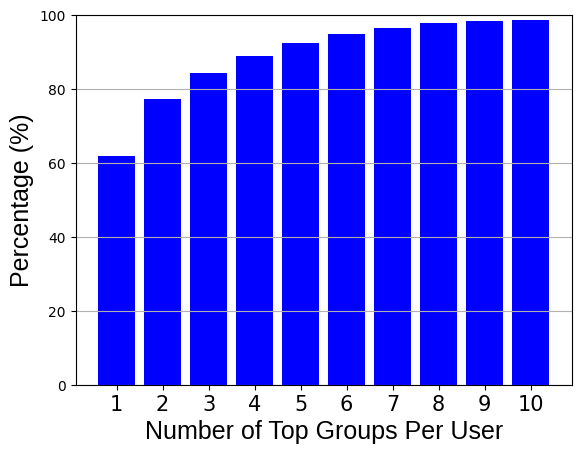

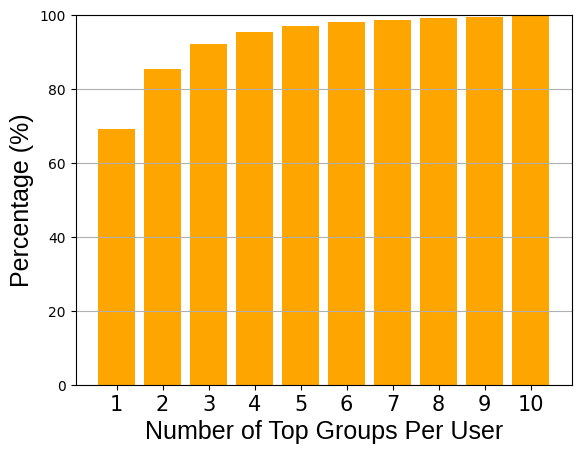

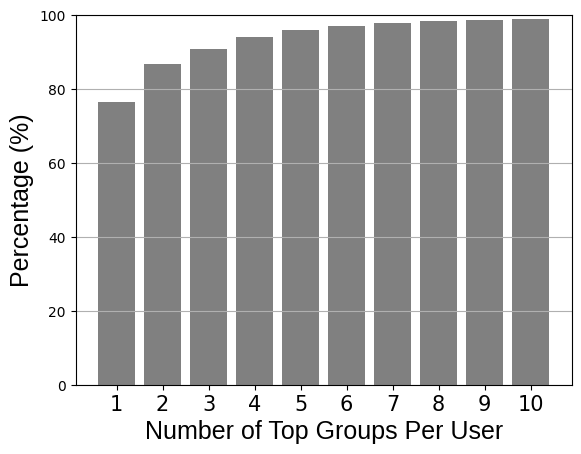

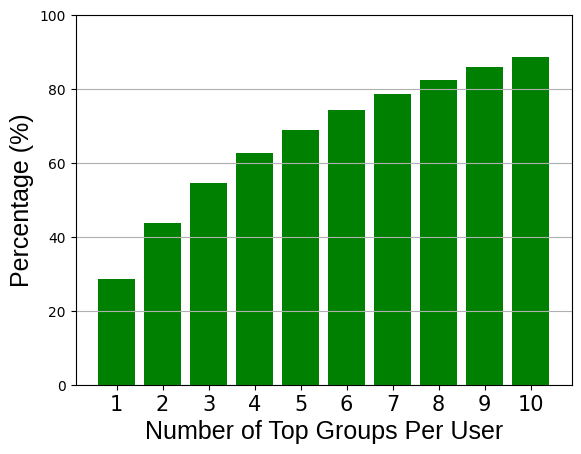

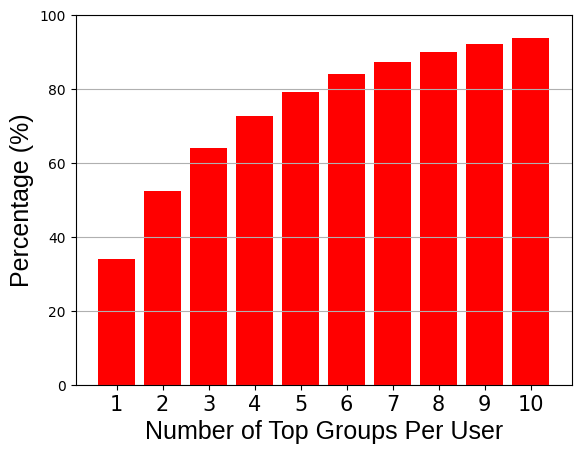

In [50]:
def plot_123(a, color):
    plt.grid(axis="y")

    plt.bar(list(range(1, 11)), np.array(a)*100, color=color)
    plt.ylabel('Percentage (%)', fontproperties=font_properties)
    plt.xlabel('Number of Top Groups Per User', fontproperties=font_properties)
    plt.xticks(list(range(1, 11)), list(range(1, 11)), fontsize=15)
    plt.ylim(0, 100)
    plt.show()

# bw, mira, theta, philly, helios
a =[0.6194840399786984, 0.7729370934866642, 0.8425218118648454, 0.8906973579175446, 0.9238788917664792, 0.9479635533005115, 0.9659413769736639, 0.9788211703158228, 0.9842781315514204, 0.987734831866639]
b =[0.6918350088912488, 0.8533482445948762, 0.921081711512026, 0.9533918131448507, 0.9710197995695022, 0.9810033596267114, 0.9872495542508333, 0.9916599140171835, 0.9944420135092896, 0.9964546220465884]
c = [0.7662938436666162, 0.8668546215769767, 0.909571534301365, 0.9400391693101179, 0.9592881972727516, 0.9700582043362783, 0.9783881259698083, 0.9836006993258972, 0.9874667950535888, 0.9907747370684433]
d =[0.28569096620357964, 0.4384045247520146, 0.545916628344075, 0.6263372405355048, 0.6897181499719287, 0.7429051624867624, 0.7877784887121456, 0.8257544812862695, 0.8583802658301265, 0.8858856158005057]
e = [0.3412589175944932, 0.5253771632298813, 0.6401852895114848, 0.7268169396811582, 0.7918618794877094, 0.8394237557838181, 0.8733033543091736, 0.9005927265133411, 0.9214560290971314, 0.9370205635505027]

x = [a,b,c,d,e]
# colors = ['#1f77b4', '#ff7f0e', "#d62432", '#2ca02c', '#d62728']
colors = ['blue', 'orange', "grey", 'green', 'red']


for i, j in zip(x, colors):
    plot_123(i,j)


# JGC - Job Waiting Time - Avg wait time


In [ ]:
# bw-cpu: <32, 32~192, >192
# mira: 8192.0, 16384.0
# philly: =1, >1
# helios: =1, >1
bw_df["gpu_num"].quantile(100/100)

4228.0

In [ ]:
def plot_cdf_util(x, y, xlabel, ylabel="Frequency (%)",color="", linestyle="--"):
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    y = np.array(y)
    cdf = 100*y/y.sum()
    if color:
        plt.plot(x, cdf, linestyle=linestyle, linewidth=5, color=color)
    else:
        plt.plot(x, cdf, linestyle=linestyle, linewidth=5)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.margins(0)
    plt.ylim(0, 100)
    plt.grid(True)

In [ ]:
def plot_size_util(data, a, b, col="cpu_num"):
    data = data.copy()
    data["core_hour"] = data.apply(lambda row: row[col]*row["run_time"], axis=1)
    data = data[data[col]!=0]
    data_a = data[data[col]<=a]
    data_b = data[(data[col]>a) & (data[col]<=b)]
    data_c = data[data[col]>b]
    s = data["core_hour"].sum()
    print(data_a["core_hour"].sum()/s, data_b["core_hour"].sum()/s, data_c["core_hour"].sum()/s)

def plot_runtime_util(data, a, b, col="cpu_num"):
    data = data.copy()
    data["core_hour"] = data.apply(lambda row: row[col]*row["run_time"], axis=1)
    data = data[data[col]!=0]
    data_a = data[data["run_time"]<=a]
    data_b = data[(data["run_time"]>a) & (data["run_time"]<=b)]
    data_c = data[data["run_time"]>b]
    s = data["core_hour"].sum()
    print(data_a["core_hour"].sum()/s, data_b["core_hour"].sum()/s, data_c["core_hour"].sum()/s)

## cores

In [ ]:
plot_size_util(bw_df, 22636*32//10, 3*22636*32//10)

0.8621423238064212 0.04481752861242556 0.09304014758115327


In [ ]:
plot_size_util(mira_df_2, 49152*16//10, 3*49152*16//10)

0.3411881311390447 0.4663087544440705 0.1925031144168848


In [ ]:
plot_size_util(sc_df, 32000//10, 3*32000//10)

0.9943956629830495 0.005604337016950559 0.0


In [ ]:
plot_size_util(philly_df, 1, 8, col="gpu_num")

0.18481045448312355 0.6886604459099681 0.12652909960690828


In [ ]:
plot_size_util(hl_df, 1, 8, col="gpu_num")

0.04568505506303716 0.37927467415543625 0.5750402707815265


In [ ]:
plot_size_util(th_df, 281088//10, 3*281088//10)

0.15832683738393885 0.4525429334216208 0.3891302291944404


In [ ]:
plot_size_util(th_gpu_df, 1, 8, col="gpu_num")

0.5325451144201067 0.3876709786765183 0.07978390690337511


## run time

In [ ]:
plot_runtime_util(bw_df, 3600, 3600*24)

0.017430919037431256 0.6207234657441186 0.3618456152184501


In [ ]:
plot_runtime_util(mira_df_2, 3600, 3600*24)

0.047029823384298675 0.8124005341263553 0.14056964248934609


In [ ]:
plot_runtime_util(sc_df, 3600, 3600*24)

0.02980486022059174 0.3214015692928599 0.6487935704865484


In [ ]:
plot_runtime_util(philly_df, 3600, 3600*24, col="gpu_num")

0.011747226083204582 0.14327646330814822 0.8449763106086472


In [ ]:
plot_runtime_util(hl_df, 3600, 3600*24,col="gpu_num")

0.01967755349409303 0.2228495442384417 0.7574729022674653


In [ ]:
plot_runtime_util(th_df, 3600, 3600*24)

0.02034720133476478 0.795683532638813 0.18396926602642222


In [ ]:
th_gpu_df["core_hour"] = th_gpu_df["gpu_num"] * th_gpu_df["run_time"]


In [ ]:
plot_runtime_util(th_gpu_df, 3600, 3600*24, col="gpu_num")

0.055959039149456095 0.9433836109411401 0.0006573499094039204


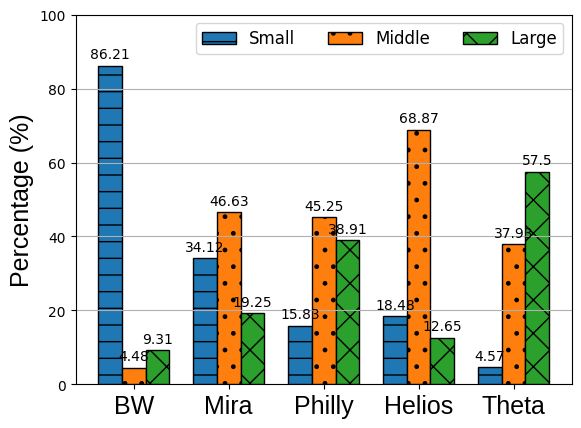

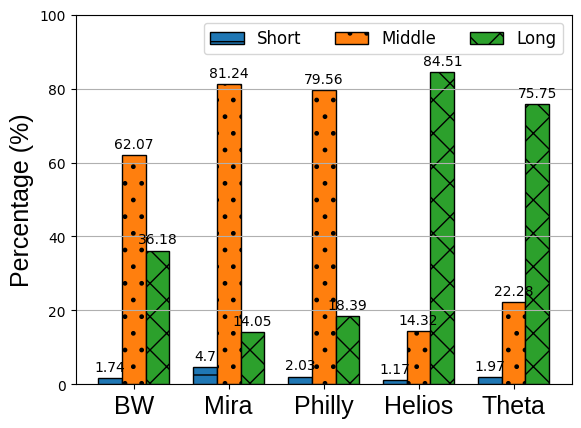

In [51]:
def plot_percentage_corehour(run_time=False):
    plt.style.use("default")
    traces = ("BW", "Mira", "Philly", "Helios", "Theta")
    if run_time:
        status = {
            'Short': (1.74, 4.70, 2.03, 1.17, 1.97),
            'Middle': (62.07, 81.24, 79.56, 14.32, 22.28),
            'Long': (36.18, 14.05, 18.39, 84.51, 75.75),
        }
    else:
        status = {
            'Small': (86.21, 34.12, 15.83, 18.48, 4.57),
            'Middle': (4.48, 46.63, 45.25, 68.87, 37.93),
            # theta 29 -> 39
            'Large': (9.31, 19.25, 38.91, 12.65, 57.50),
        }

    x = np.arange(len(traces))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots()
    hatches= ["-", ".", "x", "-", "o"]
    for i, (attribute, measurement) in enumerate(status.items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[i], edgecolor='black')
        ax.bar_label(rects, padding=3)
        multiplier += 1
    ax.set_ylabel('Percentage (%)', fontproperties=font_properties)
    ax.set_xticks(x + width, traces, fontproperties=font_properties)
    ax.legend(fontsize=12, ncol = 3)
    ax.set_ylim(0, 100)
    plt.grid(axis="y")
    plt.show()

plot_percentage_corehour()
plot_percentage_corehour(True)

# JFC - Job Failures Distribution

In [ ]:
a = hl_df.groupby("state")["core_hour"].sum()
a/a.sum()*100

state
Failed     6.635605
Killed    40.943660
Pass      52.420735
Name: core_hour, dtype: float64

In [ ]:
hl_df["state"].replace({ 'COMPLETED' : "Pass", 'FAILED' : "Failed", 'CANCELLED' : "Killed", "NODE_FAIL":"Failed","TIMEOUT":"Failed"}, inplace=True)

In [ ]:
a = philly_df.groupby("state")["core_hour"].sum()
a/a.sum()*100

state
Failed    33.405257
Killed    32.818374
Pass      33.776369
Name: core_hour, dtype: float64

In [ ]:
a = bw_df.groupby("new_status")["node_hour"].sum()
a/a.sum()*100

new_status
Failed     4.905878
Killed    41.454704
Pass      53.639418
Name: node_hour, dtype: float64

In [ ]:
bw_df["new_status"].replace({ 'NM' : "Pass", 'SIGABRT' : "Failed", 'SIGTERM' : "Killed", 'SIGKILL' : "Killed", "SIGSEGV":"Failed","Unknown":"Failed"}, inplace=True)

In [ ]:
a = mira_df_2.groupby("new_status")["node_hour"].sum()
a/a.sum()*100

new_status
Failed     5.769631
Killed    37.286633
Pass      56.943736
Name: node_hour, dtype: float64

In [ ]:
mira_df_2["new_status"].replace({ 'NM' : "Pass", 'SIGABRT' : "Failed", 'SIGTERM' : "Killed", 'SIGKILL' : "Killed", "SIGSEGV":"Failed","Unknown":"Failed"}, inplace=True)

In [ ]:
a = sc_df.groupby("new_status")["node_hour"].sum()
a/a.sum()*100

new_status
Failed     1.373503
Killed     6.670075
Pass      91.956422
Name: node_hour, dtype: float64

In [ ]:
a = th_df.groupby("new_status")["node_hour"].sum()
a/a.sum()*100

new_status
Failed     3.665590
Killed    44.918331
Pass      51.416080
Name: node_hour, dtype: float64

In [ ]:
a = th_gpu_df.groupby("new_status")["node_hour"].sum()
a/a.sum()*100

new_status
Failed    66.374743
Killed     5.419667
Pass      28.205590
Name: node_hour, dtype: float64

In [ ]:
def percentage_of_status(data, col="state"):
    return data[col].value_counts(normalize=True) * 100

In [ ]:
percentage_of_status(hl_df)

Pass      64.724931
Killed    21.154635
Failed    14.120434
Name: state, dtype: float64

In [ ]:
percentage_of_status(philly_df)

Pass      59.581335
Failed    30.901223
Killed     9.517442
Name: state, dtype: float64

In [ ]:
percentage_of_status(bw_df, col="new_status")

Pass      64.995426
Killed    27.647416
Failed     7.357157
Name: new_status, dtype: float64

In [ ]:
percentage_of_status(mira_df_2, col="new_status")

Pass      70.055092
Killed    21.028079
Failed     8.916830
Name: new_status, dtype: float64

In [ ]:
percentage_of_status(sc_df, col="new_status")


Pass      93.321172
Killed     5.196044
Failed     1.482784
Name: new_status, dtype: float64

In [ ]:
percentage_of_status(th_df, col="new_status")

Pass      62.139975
Killed    29.622930
Failed     8.237095
Name: new_status, dtype: float64

In [ ]:
percentage_of_status(th_gpu_df, col="new_status")

Failed    55.432186
Pass      24.435990
Killed    20.131823
Name: new_status, dtype: float64

In [ ]:
%load_ext autoreload
%autoreload 2

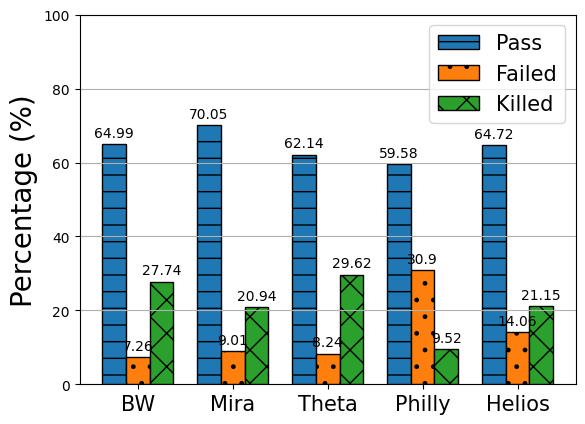

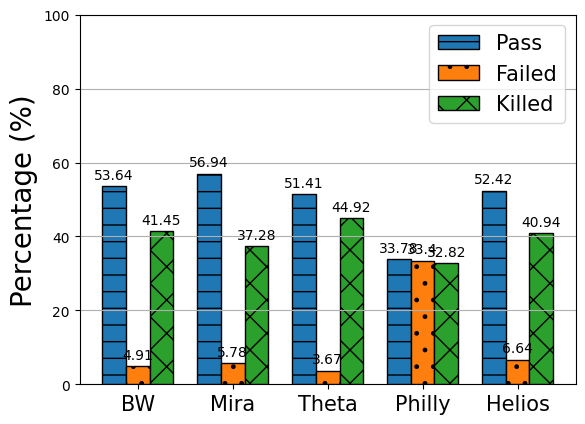

In [ ]:


from matplotlib import pyplot as plt
def plot_percentage_status(job_counts=True):
    plt.style.use("default")
    traces = ("BW", "Mira", "Theta", "Philly", "Helios")
    if job_counts:
        status = {
            'Pass': (64.99, 70.05, 62.14, 59.58, 64.72),
            'Failed': (7.26, 9.01, 8.24, 30.90, 14.06),
            'Killed': (27.74, 20.94, 29.62, 9.52, 21.15),
        }
    # core hoursPass
    else:
        status = {
            'Pass': (53.64, 56.94, 51.41, 33.78, 52.42),
            'Failed': (4.91, 5.78, 3.67, 33.40, 6.64),
            'Killed': (41.45, 37.28, 44.92, 32.82, 40.94),
        }
    x = np.arange(len(traces))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots()
    hatches= ["-", ".", "x", "-"]
    for i, (attribute, measurement) in enumerate(status.items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[i], edgecolor='black')
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel('Percentage (%)', fontsize=20)
    ax.set_xticks(x + width, traces, fontsize=15)
    ax.legend(fontsize=15)
    ax.set_ylim(0, 100)
    plt.grid(axis="y")
    plt.show()

plot_percentage_status()
plot_percentage_status(False)

# Check JGC - System utilization and resource occupation

In [ ]:
def plot_util(data, total_nodes, key="node_num", color='b', title = "none"):
    data = data.copy()
    start_time = list(data["submit_time"])[0]
    end_time = list(data["submit_time"])[-1]
    duration = end_time - start_time
    days = int(duration/(24*3600))
    days_usage = [0]*days
    data["start_time"] = data.apply(lambda row: row["submit_time"] + row["wait_time"]-start_time, axis=1)
    data["end_time"] = data.apply(lambda row: row["start_time"] + row["run_time"], axis=1)
    data["start_day"] = data.apply(lambda row: int(row["start_time"]/(24*3600)), axis=1)
    data["end_day"] = data.apply(lambda row: int(row["end_time"]/(24*3600))+1, axis=1)
    for index, row in data.iterrows():
        for i in range(int(row["start_day"]), int(row["end_day"])):
            if i <len(days_usage):
                days_usage[i] += row[key]*(min(row["end_time"], (i+1)*24*3600)-max(row["start_time"], i*24*3600))
    print(np.mean(np.array(days_usage)/(total_nodes*24*3600)))
    plt.bar(range(len(days_usage)), 100*np.array(days_usage)/(total_nodes*24*3600), color=color)
    plt.plot([-10, 150], [80]*2, color="black", linestyle="--")
    plt.ylim([0, 100])
    plt.xlim([-5, 121])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Time (Days)", fontsize=26)
    plt.ylabel("System Utilization(%)", fontsize=26)
    plt.title(title, fontsize = 18)

def plot_wait(data, total_nodes, key="node_num", color='b'):
    data = data.copy()
    start_time = list(data["submit_time"])[0]
    end_time = list(data["submit_time"])[-1]
    duration = end_time - start_time
    days = int(duration/(24*3600))
    days_usage = [0]*days
    data["start_time"] = data.apply(lambda row: row["submit_time"] + row["wait_time"]-start_time, axis=1)
    data["end_time"] = data.apply(lambda row: row["start_time"] + row["run_time"], axis=1)
    data["start_day"] = data.apply(lambda row: int(row["start_time"]/(24*3600)), axis=1)
    data["end_day"] = data.apply(lambda row: int(row["end_time"]/(24*3600))+1, axis=1)
    c = [1]*days
    for index, row in data.iterrows():
        if row["start_day"]<days:
            days_usage[row["start_day"]] += row["wait_time"]
            c[row["start_day"]] += 1
    print(np.mean(np.array(days_usage)/np.array(c)))
    plt.bar(range(len(days_usage)), np.array(days_usage)/np.array(c), color=color)
    plt.xlabel("Time (Days)", fontsize=20)
    plt.ylabel("Average Wait Time (s)", fontsize=20)

ppppp = pd.read_csv("/content/drive/My Drive/data_clusters/philly_df_schedule.csv")


0.8263228359514845


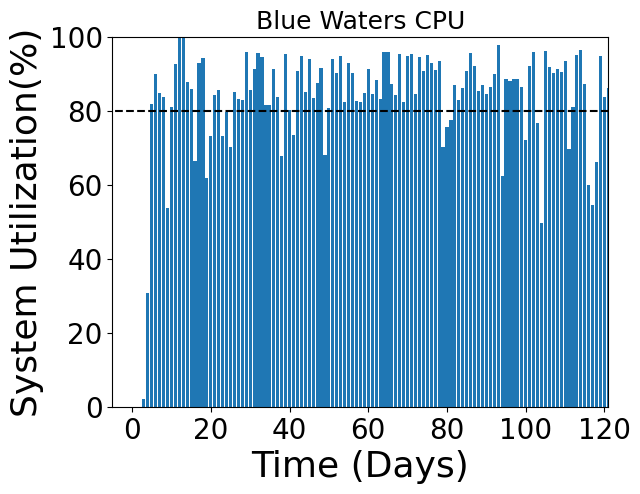

In [ ]:
# Ask di why 22636*32 here instead of 22636
plot_util(bw_df[1000:], 22636*32, "cpu_num", color="#1f77b4", title = "Blue Waters CPU")

0.811576689201619


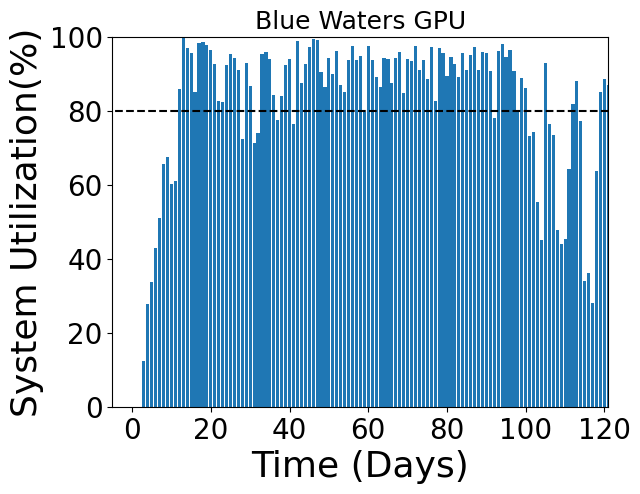

In [ ]:
plot_util(bw_df[1000:], 4228, "gpu_num", color="#1f77b4", title = "Blue Waters GPU")

0.8613768690940143


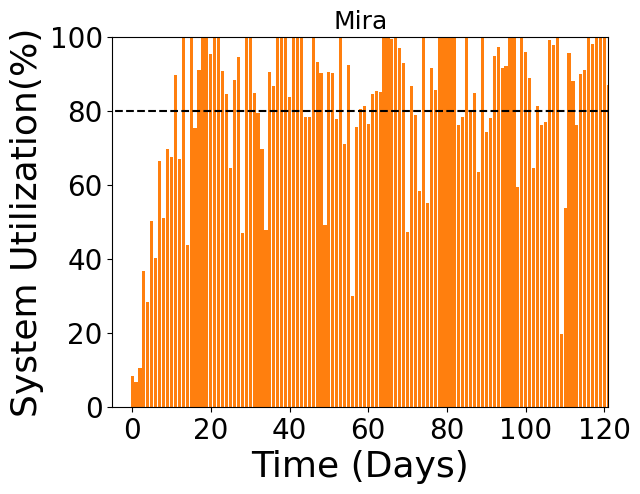

In [ ]:
plot_util(mira_df_2, 49152, color='#ff7f0e', title = "Mira" )

0.39782193486637185


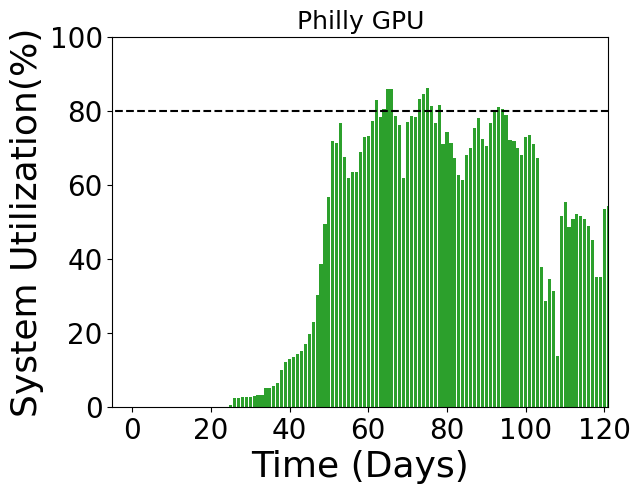

In [ ]:
plot_util(philly_df, 2490, "gpu_num", color='#2ca02c', title = "Philly GPU")

0.7644415673059766


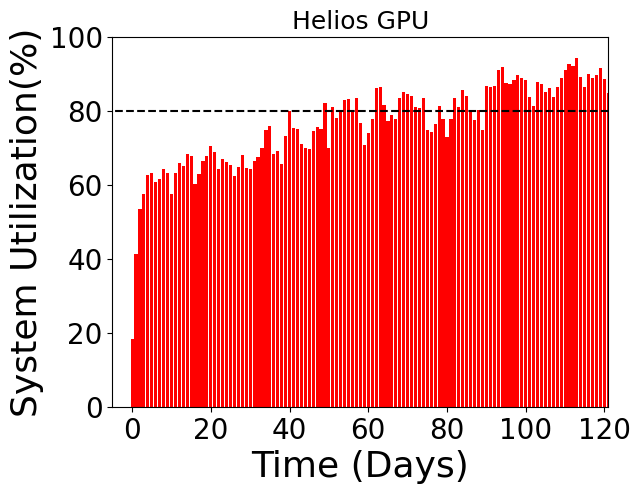

In [ ]:
plot_util(hl_df, 1080, "gpu_num", color = "#FF0000", title="Helios GPU")

0.3980970879706188


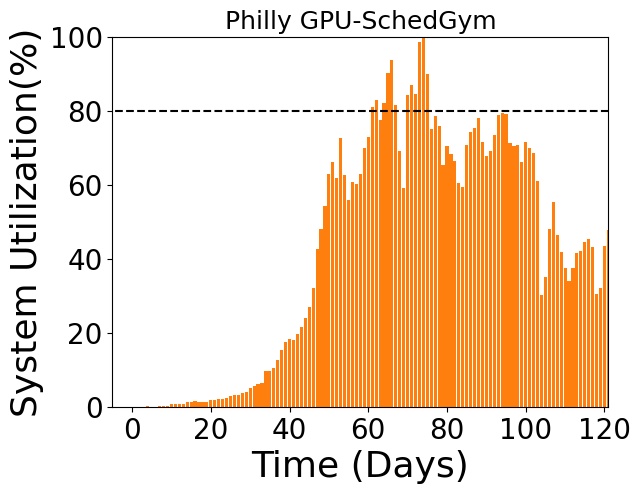

In [ ]:
plot_util(ppppp, 2490, "gpu_num", color='#ff7f0e', title = "Philly GPU-SchedGym")

0.49560488181842033


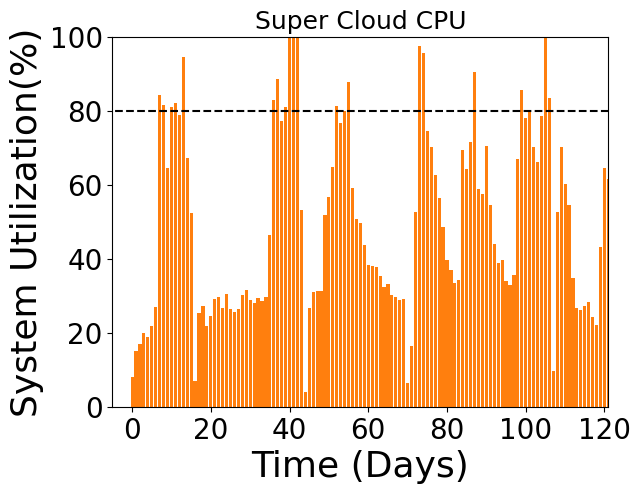

In [ ]:
# Ask di they are saying in the website the total is 704 but in node_num the max is 891
plot_util(sc_df, 891, color='#ff7f0e', title = "Super Cloud CPU")

0.6922786767506126


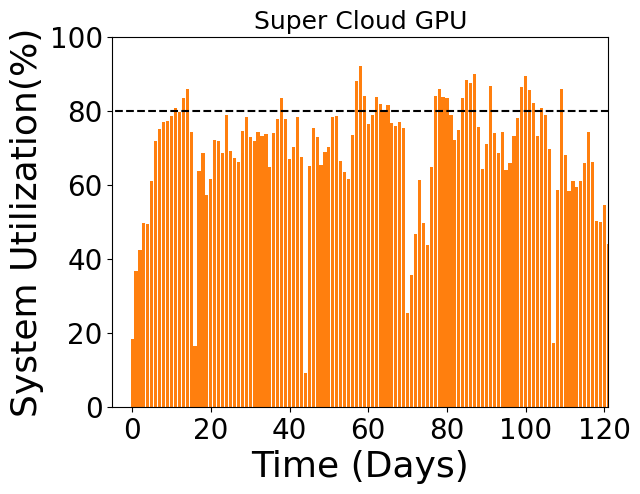

In [ ]:
# Ask di if I have to email MIT to find out about the total nodes - 448 is total no of gpus
plot_util(sc_df, 448, "gpu_num", color='#ff7f0e', title = "Super Cloud GPU")

0.86220405119434


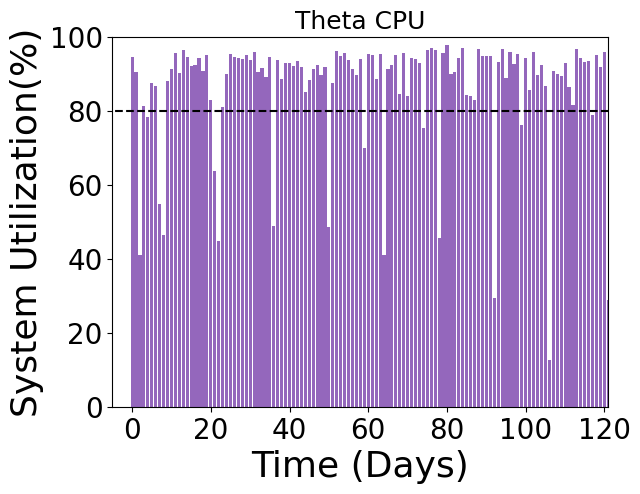

In [ ]:
plot_util(th_df, 4392, color="#9467bc", title = "Theta CPU")

0.5059887839988426


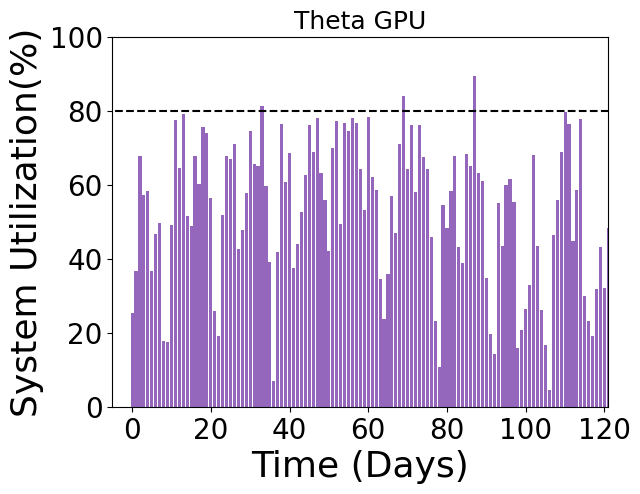

In [ ]:
plot_util(th_gpu_df, 24, "gpu_num", color="#9467bc", title = "Theta GPU")

# JGC - Job utilization fig 6

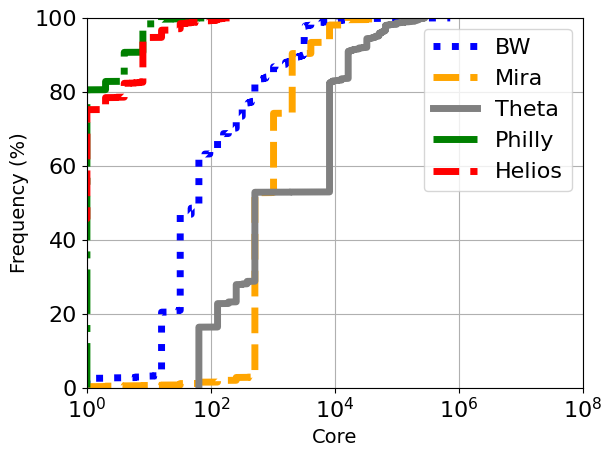

In [ ]:
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in bw_df.iterrows()], 100000, "Core", linestyle=":", color="blue")
plot_cdf(mira_df_2["node_num"], 100000, "Core", linestyle="--", color= "orange")
plot_cdf(th_df["cpu_num"], 100000, "Core", linestyle="solid", color = "grey")
plot_cdf(philly_df["gpu_num"], 100000, "Core", linestyle="-.", color="green")
plot_cdf(hl_df["gpu_num"], 100000, "Core", linestyle="--", color = "red")
plt.legend(["BW","Mira", "Theta", "Philly","Helios"], fontsize = 16)
plt.xscale("log")
plt.rc('legend',fontsize=23)


(0.001, 100000000)

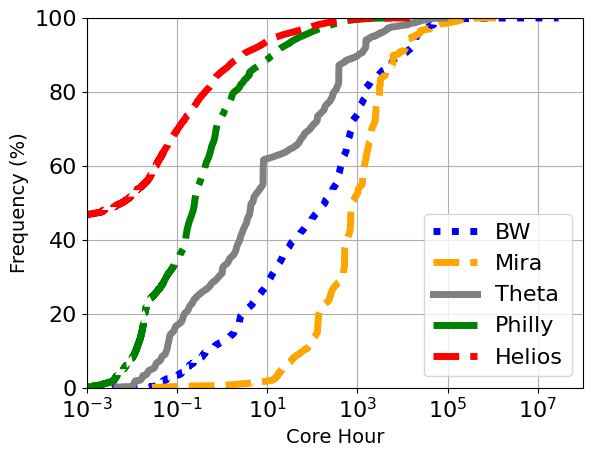

In [ ]:
plot_cdf(bw_df.apply(lambda row:row["cpu_num"] if row["cpu_num"]!=0 else row["gpu_num"]*16, axis=1)*bw_df["run_time"]/3600, 100000, "Core Hour", linestyle=":", color="blue")
plot_cdf(mira_df_2["node_num"]*mira_df_2["run_time"]/3600, 100000, "Core Hour", linestyle="--", color = "orange")
plot_cdf(th_df["node_num"]*th_df["run_time"]/3600, 100000, "Core Hour", linestyle="solid", color = "grey")
plot_cdf(philly_df["gpu_num"]*philly_df["run_time"]/3600, 100000, "Core Hour", linestyle="-.", color="green")
plot_cdf(hl_df["gpu_num"]*hl_df["run_time"]/3600, 100000, "Core Hour", linestyle="--", color= "red")
plt.legend(["BW","Mira", "Theta", "Philly","Helios"], fontsize = 16)
plt.xscale("log")
# plt.rc('legend',fontsize=208)
plt.xlim(10**-3, 10**8)


# Wait Time

### Correlation between job waiting time and two other geometries: job size and run time

In [ ]:
def plot_size_wait(data, a, b, col="cpu_num"):
    data = data.copy()
    data = data[data[col]!=0]
    data_a = data[data[col]<=a]
    data_b = data[(data[col]>a) & (data[col]<=b)]
    data_c = data[data[col]>b]
    s = 3600
    print([data_a["wait_time"].mean()/s, data_b["wait_time"].mean()/s, data_c["wait_time"].mean()/s])

In [ ]:
plot_size_wait(bw_df, 22636*32//10, 3*22636*32//10)

[15.610580829115587, 143.61881720430108, 53.33277777777778]


In [ ]:
plot_size_wait(mira_df_2, 49152*16//10, 3*49152*16//10)

[12.21851212568202, 50.95563719353156, 42.83301327088213]


In [ ]:
plot_size_wait(sc_df, 32000//10, 3*32000//10)

[3.100678670766506, 1.1006172839506172, nan]


In [ ]:
plot_size_wait(philly_df, 1, 8, col="gpu_num")

[5.6783026495957145, 15.844315164349887, 13.263183134274339]


In [ ]:
plot_size_wait(hl_df, 1, 8, col="gpu_num")

[0.325380278802788, 0.38627875170306253, 0.5382344387951622]


In [ ]:
plot_size_wait(th_df, 281088//10, 3*281088//10)

[3.3466511282685305, 28.203514745472344, 189.69215686274512]


In [ ]:
plot_size_wait(th_gpu_df, 1, 8, col="gpu_num")

[1.2762069412756525, 1.1464152857883976, 5.232933145009417]


In [ ]:
plot_size_wait(bw_df, 3600, 3600*24, col="run_time")

[13.285402474799616, 24.828667705613867, 35.33365300912987]


In [ ]:
plot_size_wait(mira_df_2, 3600, 3600*24, col="run_time")

[7.2123573672291625, 20.935813412920684, 75.19285612535613]


In [ ]:
plot_size_wait(sc_df, 3600, 3600*24, col="run_time")

[1.6401694667419018, 4.775721370439395, 5.480534576257768]


In [ ]:
plot_size_wait(philly_df, 3600, 3600*24, col="run_time")

[4.97759122049386, 8.841229740889853, 44.14692331534147]


In [ ]:
plot_size_wait(hl_df, 3600, 3600*24, col="run_time")

[0.20340148547736853, 1.6412862644711959, 1.5331307237813885]


In [ ]:
plot_size_wait(th_df, 3600, 3600*24, col="run_time")

[2.574054683263786, 18.38023224137145, 58.710919669669664]


In [ ]:
plot_size_wait(th_gpu_df, 3600, 3600*24, col="run_time")

[0.37516809484947405, 2.9525102659297695, 0.0011111111111111111]


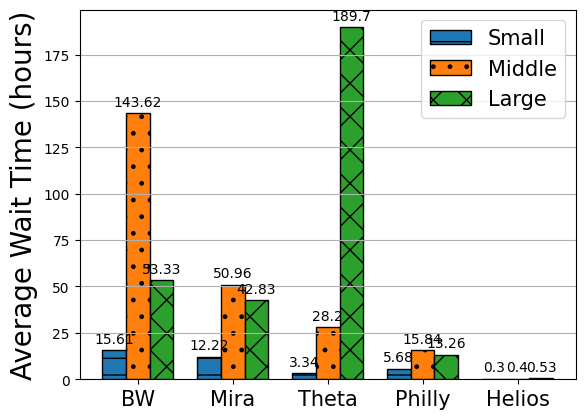

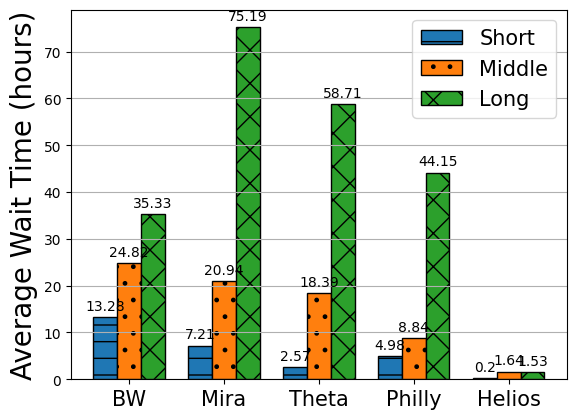

In [ ]:
def plot_size_wait_figure(run_time=False):
    plt.style.use("default")
    traces = ("BW", "Mira", "Theta", "Philly", "Helios")
    if run_time:
        status = {
            'Short': (13.28, 7.21, 2.57, 4.98, 0.20),
            'Middle': (24.82, 20.94, 18.39, 8.84, 1.64),
            # Theta changed from 85.65 -> 92.04 -> 58.71
            'Long': (35.33, 75.19, 58.71, 44.15, 1.53),
        }
    else:
        status = {
            'Small': (15.61, 12.22, 3.34, 5.68, 0.3),
            'Middle': (143.62, 50.96, 28.20, 15.84, 0.4),
            # here theta has changed to 153.07 -> 66.07 -> 189.70
            'Large': (53.33, 42.83, 189.70, 13.26, 0.53),
        }

    x = np.arange(len(traces))
    width = 0.25
    multiplier = 0
    fig, ax = plt.subplots()
    hatches= ["-", ".", "x", "-"]
    for i, (attribute, measurement) in enumerate(status.items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[i], edgecolor='black')
        ax.bar_label(rects, padding=3)
        multiplier += 1
    ax.set_ylabel('Average Wait Time (hours)', fontsize=20)
    ax.set_ylabel('Average Wait Time (hours)', fontsize=20)
    ax.set_xticks(x + width, traces, fontsize=15)
    ax.legend(fontsize=15)
    plt.grid(axis="y")
    plt.show()

plot_size_wait_figure()

plot_size_wait_figure(True)


# Fig 7

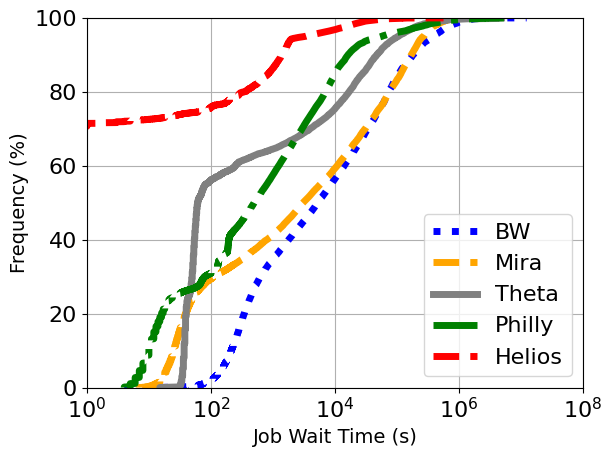

In [ ]:
plot_cdf(bw_df["wait_time"], 100000, "Job Wait Time (s)", linestyle=":", color = "blue")
plot_cdf(mira_df_2["wait_time"], 100000, "Job Wait Time (s)", linestyle= "--", color  = "orange")
plot_cdf(th_df["wait_time"], 100000, "Job Wait Time (s)", linestyle="solid", color="grey")
plot_cdf(philly_df[10000:130000]["wait_time"], 100000, "Job Wait Time (s)", linestyle= "-.", color = "green")
plot_cdf(hl_df["wait_time"], 100000, "Job Wait Time (s)", linestyle="--", color="red")
plt.legend(["BW", "Mira", "Theta", "Philly","Helios"], fontsize = 16)
plt.xscale("log")

# UBC - Users's Submission Behaviours

In [ ]:
from heapq import *
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import seaborn as sns
import bisect
import numpy as np
def analyze_util_and_user_behavior(data, total_nodes, gpu=False):
    queue = []
    # util, time, user
    util_time_user = defaultdict(list)
    util_node_user = defaultdict(list)
    util_time = []
    cur_util = 0
    for index, row in data.iterrows():
        row["start_time"] = row["submit_time"] + row["wait_time"]
        row["end_time"] = row["start_time"] + row["run_time"]
        row["index"] = index
        # only for helios
        total_nodes = gpu_num_total[bisect.bisect(gpu_date, row["submit_time"])-1]
        while queue and queue[0][0]<=row["submit_time"]:
            temp = heappop(queue)
            cur_time = temp[0]
            job_type = temp[1]
            job = temp[3]
            if job_type == "waiting":
                heappush(queue, (job["end_time"], "running", job["index"], job))
                cur_util += job["gpu_num"] if gpu else job["node_num"]
            elif job_type == "running":
                cur_util -= job["gpu_num"] if gpu else job["node_num"]
            else:
                raise NotImplementedError
            if util_time and util_time[-1][0] == cur_time:
                util_time[-1][1] = cur_util/total_nodes
            else:
                util_time.append([cur_time, cur_util/total_nodes])
        heappush(queue, (row["start_time"], "waiting", row["index"] , row))
        util_time_user[row["user"]].append([row["submit_time"], cur_util/total_nodes])
        util_node_user[row["user"]].append([row["gpu_num"] if gpu else row["node_num"], cur_util/total_nodes])
        if index % 10000 == 0:
            print(index)
    return util_time, util_time_user, util_node_user

def analyze_queue_and_user_behavior(data, gpu=False):
    data = data.copy()
    data["index"] = data.index
    queue = []
    util_time_user = defaultdict(list)
    util_node_user = defaultdict(list)
    util_time = []
    cur_wait = 0
    for index, row in data.iterrows():
        start_time = row["submit_time"] + row["wait_time"]
        end_time = start_time + row["run_time"]
        while queue and queue[0][0]<=row["submit_time"]:
            temp = heappop(queue)
            cur_time = temp[0]
            job_type = temp[1]
            job = temp[3]
            if job_type == "waiting":
                heappush(queue, (job["submit_time"] + job["wait_time"]+job["run_time"], "running", job["index"], job))
                cur_wait -= 1
            elif job_type == "running":
                pass
            else:
                raise NotImplementedError
            util_time.append([cur_time, cur_wait])
        heappush(queue, (start_time, "waiting", index, row))
        util_time_user[row["user"]].append([row["run_time"], cur_wait])
        util_node_user[row["user"]].append([row["gpu_num"] if gpu else row["node_num"], cur_wait])
        cur_wait += 1
        if index % 10000 == 0:
            print(index)
    return util_time, util_time_user, util_node_user

def plot_util_node(un, data, bars, user="per", xlabel="mira"):
    hatches= ["-", ".", "x", "-"]
    if user == "per":
        users = list(data.groupby("user").count().sort_values(by="job", ascending=False).index[:6])
        stride = 0.2
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))

        for ui, user in enumerate(users):
            print(ui, user)

            x = ["{:.0%}".format((1+index)*stride)
                                      for index in range(int(1/stride))]
            buckets = [Counter() for _ in range(int(1/stride))]
            for node, util in un[user]:
                b = int(min(1/stride-1, util/stride))
                buckets[b][node] += 1
            for i in buckets:
                s = sum(i.values())
                for j in i:
                    i[j] /= s
            prevy = np.array([0]*len(x))
            prev_bar = -1
            for bar in bars:
                y = np.array([sum(i[j] for j in i.keys() if prev_bar<j <=bar) for i in buckets])
                axes[ui//3, ui%3].bar(x, y, bottom=prevy)
                prevy = y+prevy
                prev_bar = bar
            axes[ui//3, ui%3].legend(bars)
    else:
        all_un = []
        for i in un:
            all_un.extend(un[i])
        max_wait = max(all_un, key=lambda x: x[1])[1]
        stride = 1/3
        fig, axes = plt.subplots(1, 1, figsize=(3, 5))

        x = ["{}".format((1+index)*stride*max_wait)
                                  for index in range(int(1/stride))]
        buckets = [Counter() for _ in range(int(1/stride))]
        for node, util in all_un:
            b = int(min(1/stride-1, (util/max_wait)/stride))
            buckets[b][node] += 1
        for i in buckets:
            i[0] = 0
            s = sum(list(i.values()))
            for j in i:
                i[j] /= s*0.01
        prevy = np.array([0]*len(x))
        prev_bar = -1
        for index, bar in enumerate(bars):
            y = np.array([sum(i[j] for j in i.keys() if prev_bar<j <=bar) for i in buckets])
            axes.bar(x, y, bottom=prevy, hatch=hatches[index], edgecolor="black")
            prevy = y+prevy
            prev_bar = bar
        axes.set_xticks(x, ["Short Queue", "Middle Queue", "Long Queue"], rotation=45)
        axes.set_xlabel(xlabel, fontsize=20)
        axes.set_ylabel("Percentage (%)", fontsize=20)


In [ ]:
mira_queue_time, mira_queue_time_user, mira_queue_node_user = analyze_queue_and_user_behavior(mira_df_2, gpu=False)

0
10000
20000


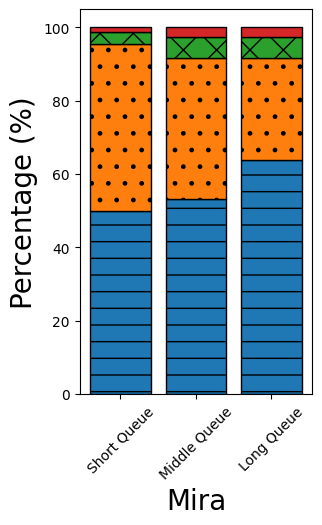

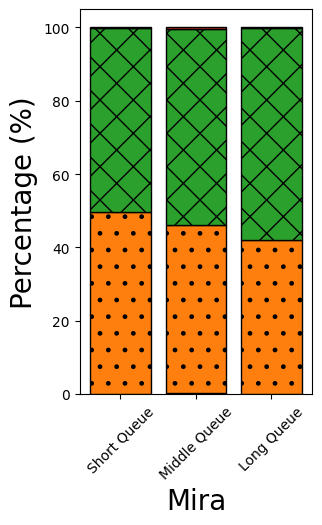

In [ ]:
bars = [ 512, 49152//10, 3*49152//10, 49152]
plot_util_node(mira_queue_node_user, mira_df_2, bars, "all", "Mira")
bars = [60, 3600, 3600*24, 100000000]
plot_util_node(mira_queue_time_user, mira_df_2, bars, "all", "Mira")

In [ ]:
bw_queue_time, bw_queue_time_user,bw_queue_node_user = analyze_queue_and_user_behavior(bw_df, gpu=False)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000


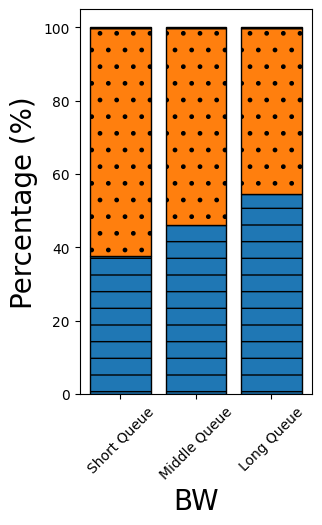

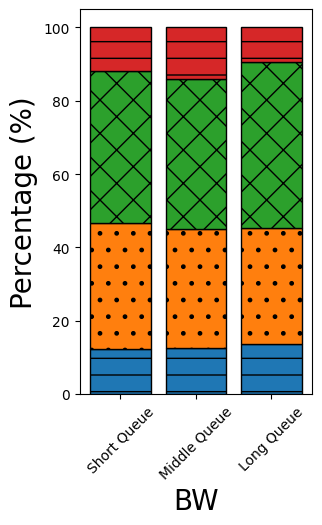

In [ ]:
bars = [1, 22636//10, 3*22636//10, 1000000]
plot_util_node(bw_queue_node_user, bw_df, bars, "all", "BW")
bars = [60, 3600, 3600*24, 1000000000]
plot_util_node(bw_queue_time_user, bw_df, bars, "all", "BW")

In [ ]:
sc_df["node_num"].max()

212

In [ ]:
sc_queue_time, sc_queue_time_user, sc_queue_node_user = analyze_queue_and_user_behavior(sc_df, gpu=False)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000


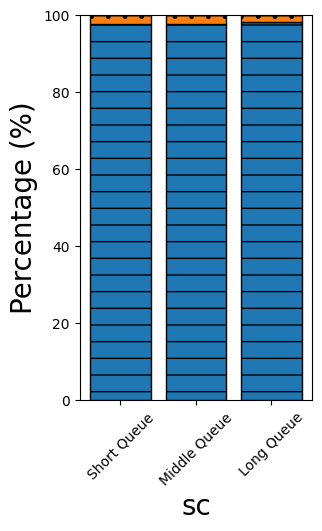

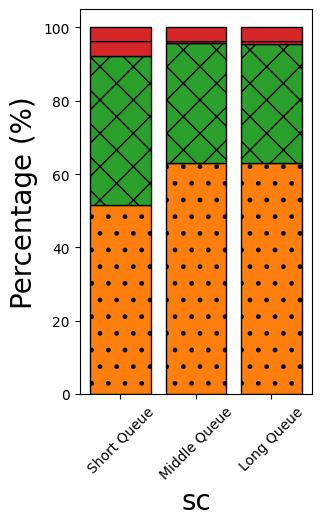

In [ ]:
bars = [1, 891//10, 3*891//10, 891]
plot_util_node(sc_queue_node_user, sc_df, bars, "all", "sc")
bars = [60, 3600, 3600*24, 1000000000]
plot_util_node(sc_queue_time_user, sc_df, bars, "all", "sc")

In [ ]:
th_queue_time, th_queue_time_user, th_queue_node_user = analyze_queue_and_user_behavior(th_df, gpu=False)

0
10000


In [ ]:
th_df['node_num'].max()

4392.0

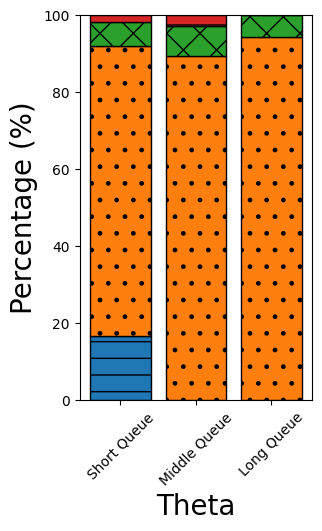

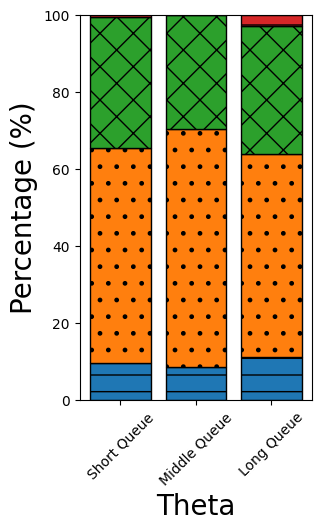

In [ ]:
bars = [1, 4392//10, 3*4392//10, 4392]
plot_util_node(th_queue_node_user, th_df, bars, "all", "Theta")
bars = [60, 3600, 3600*24, 1000000000]
plot_util_node(th_queue_time_user, th_df, bars, "all", "Theta")

In [ ]:
queue_time, queue_time_user,queue_node_user = analyze_queue_and_user_behavior(hl_df, gpu=True)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000


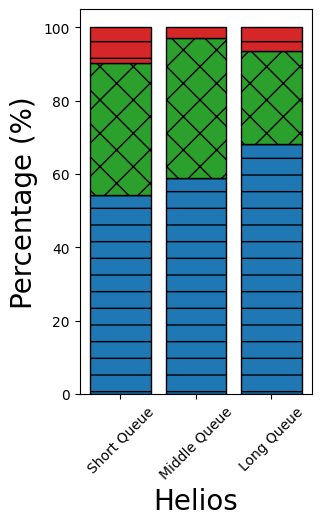

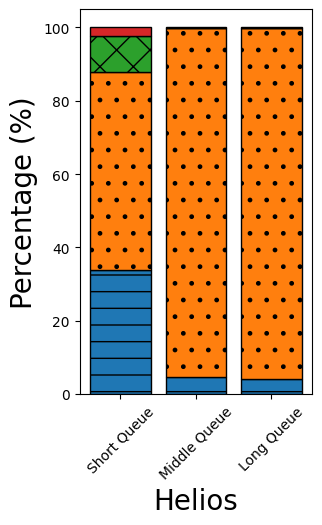

In [ ]:
bars = [1, 1, 8, 256]
plot_util_node(queue_node_user, hl_df, bars, "all", "Helios")
bars = [60, 3600, 3600*24, 1000000000]
plot_util_node(queue_time_user, hl_df, bars, "all", "Helios")

In [ ]:
phi_queue_time, phi_queue_time_user,phi_queue_node_user = analyze_queue_and_user_behavior(philly_df, gpu=True)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000


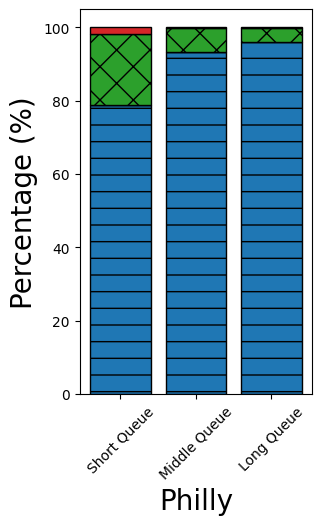

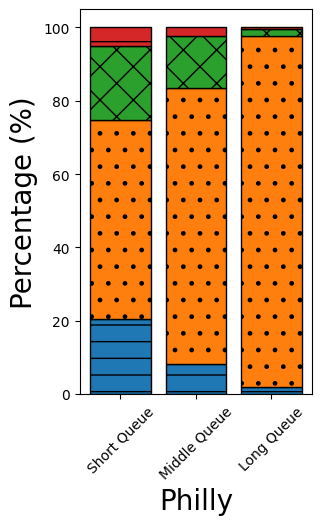

In [ ]:
bars = [1, 1, 8, 256]
plot_util_node(phi_queue_node_user, philly_df, bars, "all", "Philly")
bars = [60, 3600, 3600*24, 10000000]
plot_util_node(phi_queue_time_user, philly_df, bars, "all", "Philly")

0
10000
20000


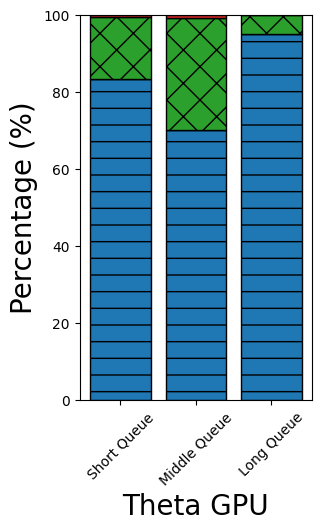

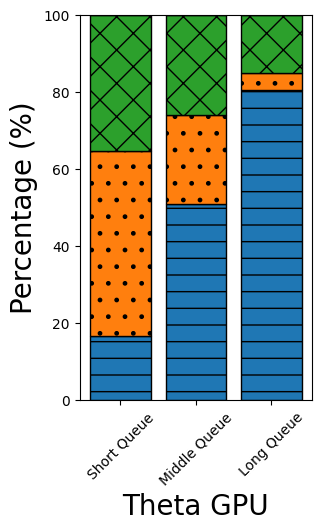

In [ ]:
th_gpu_queue_time, th_gpu_queue_time_user, th_gpu_queue_node_user = analyze_queue_and_user_behavior(th_gpu_df, gpu=True)

bars = [1, 1, 8, 256]
plot_util_node(th_gpu_queue_node_user, th_gpu_df, bars, "all", "Theta GPU")
bars = [60, 3600, 3600*24, 1000000000]
plot_util_node(th_gpu_queue_time_user, th_gpu_df, bars, "all", "Theta GPU")

# UBC - Correlation Between Job Run Time And Job Status

In [ ]:
def runtime_of_status(data, col="state", col2="run_time"):
    print(data.groupby(col)[col2].mean())

runtime_of_status(bw_df, col="new_status")
runtime_of_status(mira_df_2,col="new_status")
runtime_of_status(philly_df)
runtime_of_status(hl_df)
runtime_of_status(sc_df, col = "new_status")
runtime_of_status(th_df, col = "new_status")
runtime_of_status(th_gpu_df, col = "new_status")

new_status
Failed    14789.555892
Killed    45974.495224
Pass      27727.047692
Name: run_time, dtype: float64
new_status
Failed     2749.400598
Killed    13483.073104
Pass       7120.680873
Name: run_time, dtype: float64
state
Failed    25828.329056
Killed    85791.817081
Pass      12825.084806
Name: run_time, dtype: float64
state
Failed     5979.821737
Killed    15762.824701
Pass       5775.136077
Name: run_time, dtype: float64
new_status
Failed    25877.436665
Killed    33511.193556
Pass      25630.237693
Name: run_time, dtype: float64
new_status
Failed    1993.631520
Killed    7633.424798
Pass      4387.203756
Name: run_time, dtype: float64
new_status
Failed    7255.048073
Killed    2485.770233
Pass      7122.093863
Name: run_time, dtype: float64


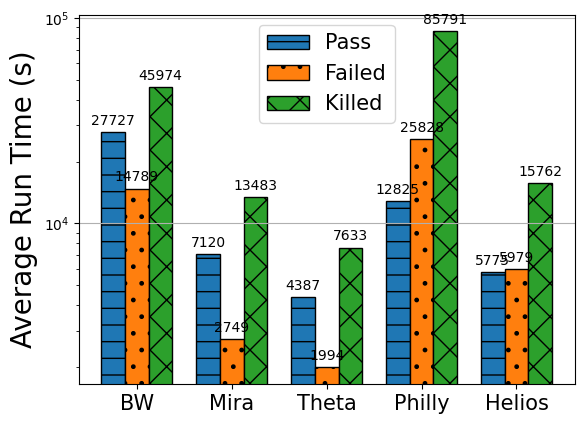

In [ ]:
def plot_runtime_of_status(runtime=False):
    plt.style.use("default")
    traces = ("BW", "Mira", "Theta", "Philly", "Helios")
    if runtime:
        status = {
            'Pass': (27727, 7120, 4387, 12825, 5775),
            'Failed': (14789, 2749,  1994, 25828, 5979),
            'Killed': (45974, 13483,  7633, 85791, 15762),
        }
    # core hours
    else:
      # not needed - we are not using this in paper
        status = {
            'Pass': (53.64, 56.94, 33.78, 52.42),
            'Failed': (4.91, 5.78, 33.40, 6.64),
            'Killed': (41.45, 37.28, 32.82, 40.94),
        }

    x = np.arange(len(traces))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots()
    hatches= ["-", ".", "x", "-"]
    for i, (attribute, measurement) in enumerate(status.items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[i], edgecolor='black')
        ax.bar_label(rects, padding=3)
        multiplier += 1
    ax.set_ylabel('Average Run Time (s)', fontsize=20)
    ax.set_xticks(x + width, traces, fontsize=15)
    ax.legend(fontsize=15)
    plt.grid(axis="y")
    plt.yscale("log")
    plt.show()
# plot_percentage_status()
plot_runtime_of_status(True)

# Check Job Failure Characterization - The distribution of different job statuses.

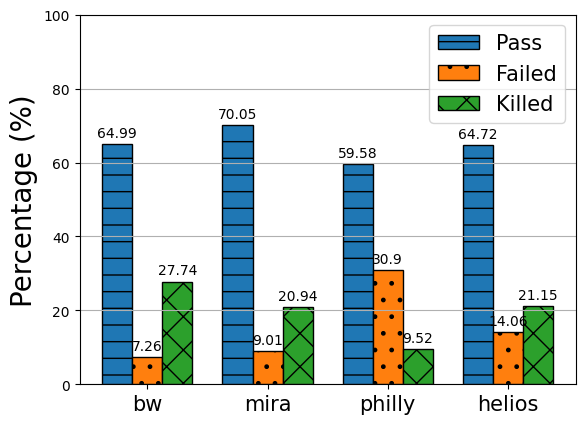

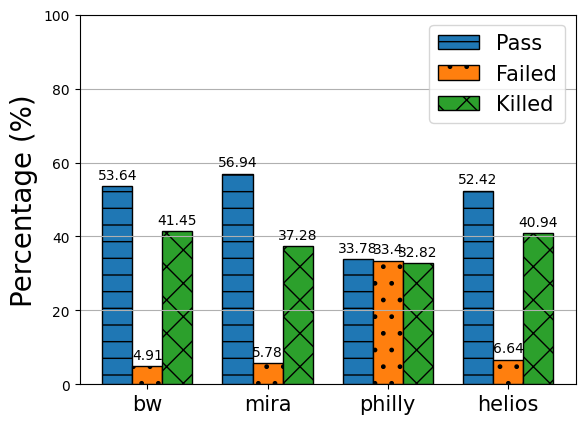

In [ ]:
# Need to find how the values were calculated.
from matplotlib import pyplot as plt
import numpy as np
def plot_runtime_status(job_counts = True):
    plt.style.use("default")
    traces = ("bw", "mira", "philly", "helios")
    if job_counts:
        status = {
            'Pass': (64.99, 70.05, 59.58, 64.72),
            'Failed': (7.26, 9.01, 30.90, 14.06),
            'Killed': (27.74, 20.94, 9.52, 21.15),

        }
    # core hours
    else:
        status = {
            'Pass': (53.64, 56.94, 33.78, 52.42),
            'Failed': (4.91, 5.78, 33.40, 6.64),
            'Killed': (41.45, 37.28, 32.82, 40.94),

        }

    x = np.arange(len(traces))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots()
    hatches= ["-", ".", "x", "-"]
    for i, (attribute, measurement) in enumerate(status.items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[i], edgecolor='black')
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percentage (%)', fontsize=20)
#     ax.set_xlabel('Traces', fontsize=20)
#     ax.set_title('Penguin attributes by species')
    ax.set_xticks(x + width, traces, fontsize=15)
    ax.legend(fontsize=15)
#     plt.legend(loc="lower left", )
    ax.set_ylim(0, 100)
    plt.grid(axis="y")
    plt.show()

plot_runtime_status()
plot_runtime_status(False)

In [ ]:
from matplotlib import ticker as mticker
import seaborn as sns

def analyze_attribute_per(u, data):
    rows = list(data.groupby(u).count().sort_values(by="job", ascending=False).index[:10])
    job_counts = list(data.groupby(u).count().sort_values(by="job", ascending=False)["job"][:10])
    sum_of_node_hour = [data.groupby(u).sum()["node_hour"].loc[i]//3600 for i in rows]
    mean_nodes = [data.groupby(u).mean()["node_num"].loc[i] for i in rows]
    mean_run_time = [data.groupby(u).mean()["run_time"].loc[i] for i in rows]
    temp_df = pd.DataFrame(list(zip(rows, job_counts, sum_of_node_hour, mean_nodes, mean_run_time)),
                           columns=[u, "job_count", "sum_of_node_hour", "mean_nodes", "mean_run_time"])
    return temp_df

def analyze_attribute_per_ml(u, data, status=["Pass","Failed","Killed"]):
    rows = list(data.groupby(u).count().sort_values(by="job", ascending=False).index[:10])
    job_counts = list(data.groupby(u).count().sort_values(by="job", ascending=False)["job"][:10])
    sum_of_node_hour = [data.groupby(u).sum()["node_hour"].loc[i]//3600 for i in rows]
    mean_nodes = [data.groupby(u).mean()["node_num"].loc[i] for i in rows]
    mean_run_time = [data.groupby(u).mean()["run_time"].loc[i] for i in rows]
    st0_run_time = [data.groupby([u, "state"]).mean()["run_time"].loc[i].get(status[0],0) for i in rows]
    st1_run_time = [data.groupby([u, "state"]).mean()["run_time"].loc[i].get(status[1],0) for i in rows]
    st2_run_time = [data.groupby([u, "state"]).mean()["run_time"].loc[i].get(status[2],0) for i in rows]

    temp_df = pd.DataFrame(list(zip(rows, job_counts, sum_of_node_hour, mean_nodes, mean_run_time, st0_run_time,
                                   st1_run_time, st2_run_time )),
                           columns=[u, "job_count", "sum_of_node_hour", "mean_nodes", "mean_run_time",
                                    "mean_run_time ({})".format(status[0]),
                                   "mean_run_time ({})".format(status[1]),
                                   "mean_run_time ({})".format(status[2])])
    return temp_df

def plot_attribute_per_ml(u, data, state="state", status=["Pass","Failed","Killed"],all_user=False):
    plt.style.use("default")
    rows = list(data.groupby(u).count().sort_values(by="job", ascending=False).index[:3])
    # rows = list(data.groupby(u).sum().sort_values(by="job", ascending=False).index[:3])
    # rows = list(data.groupby(u).sum().sort_values(by="node_hour", ascending=False).index[:3])
    if all_user:
        mean_run_time = [data["run_time"]]
        st0_run_time = [data.groupby([state])["run_time"].apply(list).get(status[0],0)]
        st1_run_time = [data.groupby([state])["run_time"].apply(list).get(status[1],0)]
        st2_run_time = [data.groupby([state])["run_time"].apply(list).get(status[2],0)]
        fig, axes = plt.subplots(1, 1, figsize=(4, 3))

        for index, i in enumerate(zip(st0_run_time, st1_run_time, st2_run_time)):
            k = [np.log10(np.array(j)+1) for j in i]
            sns.violinplot(data=k,ax=axes, scale="width")

        ax = axes
        ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        ymin, ymax = ax.get_ylim()
        tick_range = np.arange(np.floor(ymin), ymax)
        ax.yaxis.set_ticks(tick_range)
        ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        ax.yaxis.grid(True)
        ax.set_xticks([y for y in range(3)])
        ax.set_xticklabels([ "Pass", "Failed", "Killed"], fontsize=24)
        ax.set_ylabel('Job Run time (s)', fontsize=20)
    else:
        mean_run_time = [data.groupby(u)["run_time"].apply(list).loc[i] for i in rows]
        st0_run_time = [data.groupby([u, state])["run_time"].apply(list).loc[i].get(status[0],0) for i in rows]
        st1_run_time = [data.groupby([u, state])["run_time"].apply(list).loc[i].get(status[1],0) for i in rows]
        st2_run_time = [data.groupby([u, state])["run_time"].apply(list).loc[i].get(status[2],0) for i in rows]
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))

        for index, i in enumerate(zip(st0_run_time, st1_run_time, st2_run_time)):
            k = [np.log10(np.array(j)+1) for j in i]
            sns.violinplot(data=k,ax=axes[index%3], scale="width")

        for index, ax in enumerate(axes.flatten()):
            ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
            ymin, ymax = ax.get_ylim()
            tick_range = np.arange(np.floor(ymin), ymax)
            ax.yaxis.set_ticks(tick_range)
            ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True,)
            ax.yaxis.grid(True)
            ax.set_xticks([y for y in range(3)])
            ax.set_xticklabels([ "Pass", "Failed", "Killed"], fontsize=15)
            ax.set_xlabel('User '+str(index+1), fontsize=20)

            if index == 0:
                ax.set_ylabel('Job Run time (s)', fontsize=20)
    plt.show()

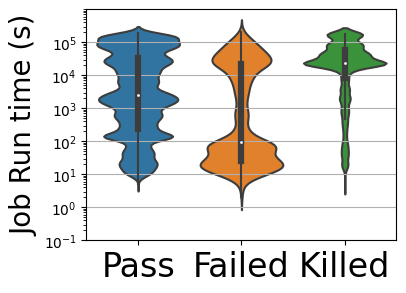

In [ ]:
plot_attribute_per_ml("user", data=bw_df, state="new_status", all_user=True)

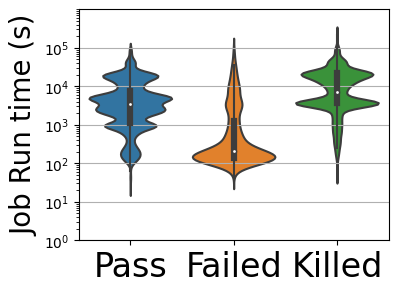

In [ ]:
plot_attribute_per_ml("user", data=mira_df_2, state="new_status", all_user=True)

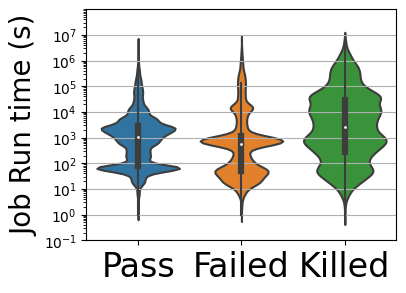

In [ ]:
plot_attribute_per_ml("user", data=philly_df, state="state", all_user=True)

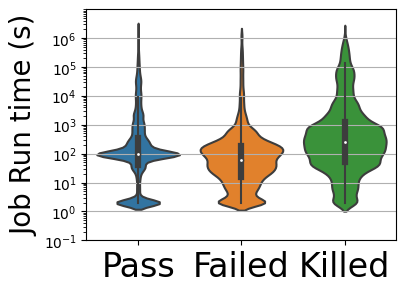

In [ ]:
plot_attribute_per_ml("user", data=hl_df, state="state", all_user=True)

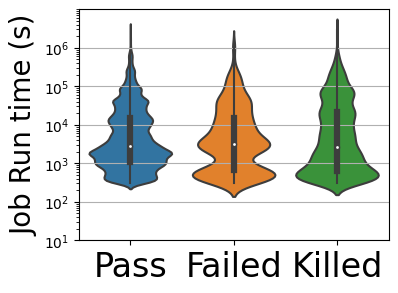

In [ ]:
plot_attribute_per_ml("user", data=sc_df, state="new_status", all_user=True)


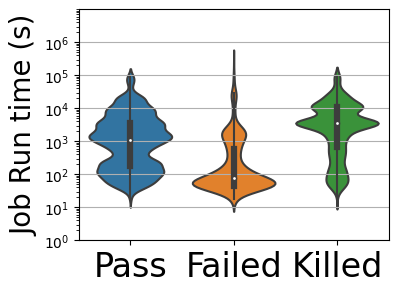

In [ ]:
plot_attribute_per_ml("user", data=th_df, state="new_status", all_user=True)

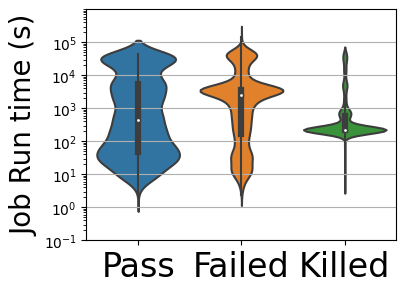

In [ ]:
plot_attribute_per_ml("user", data=th_gpu_df, state="new_status", all_user=True)


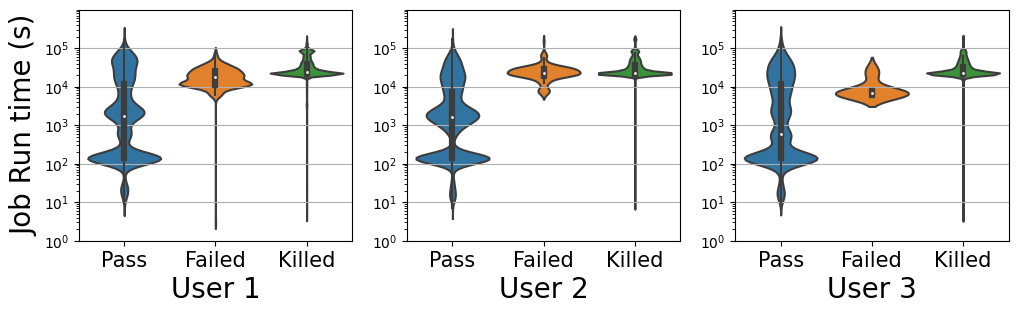

In [ ]:
plot_attribute_per_ml("user", data=bw_df, state="new_status")

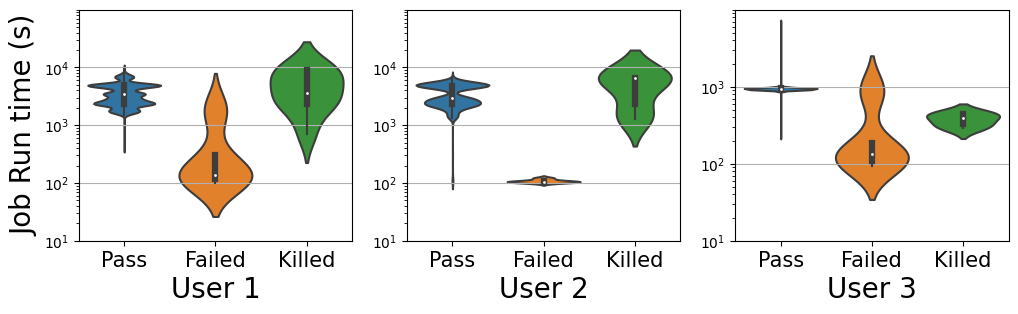

In [ ]:
plot_attribute_per_ml("user", data=mira_df_2, state="new_status", all_user=False)

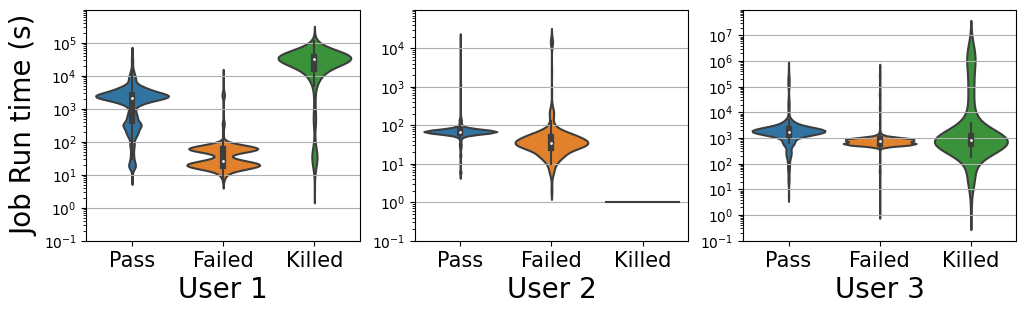

In [ ]:
plot_attribute_per_ml(u="user", data=philly_df, status=["Pass", "Failed", "Killed"])

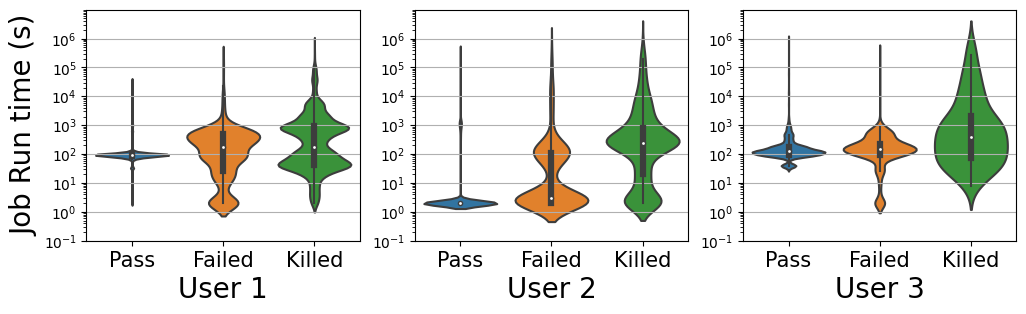

In [ ]:
plot_attribute_per_ml("user", data=hl_df)

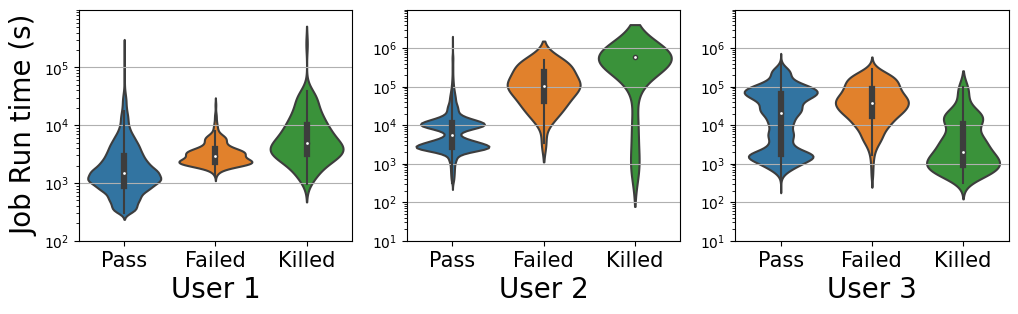

In [ ]:
plot_attribute_per_ml("user", data=sc_df, state="new_status", all_user=False)


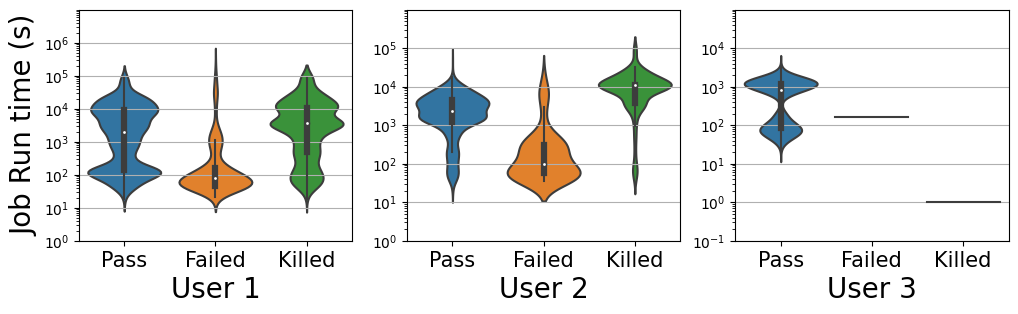

In [ ]:
plot_attribute_per_ml("user", data=th_df, state="new_status", all_user=False)

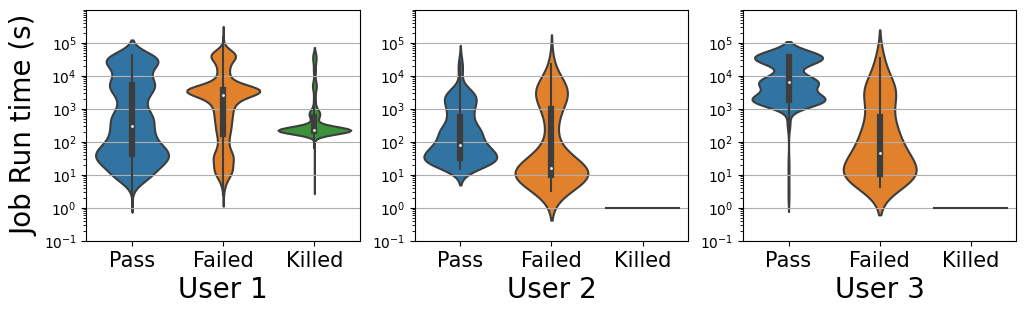

In [ ]:
plot_attribute_per_ml("user", data=th_gpu_df, state="new_status", all_user=False)

# JGC - Job Run Time - CDF

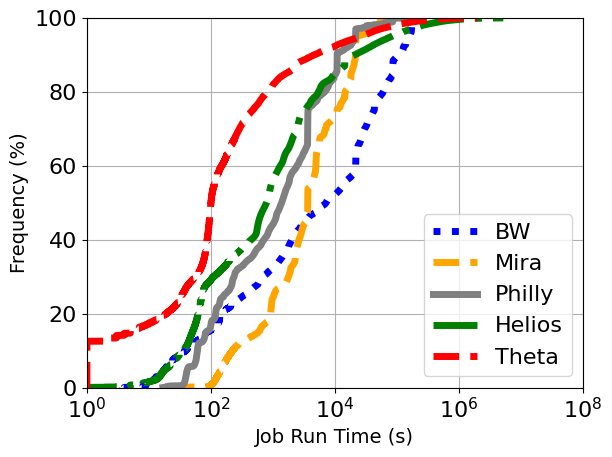

In [ ]:
plt.style.use("default")
plot_cdf(bw_df["run_time"], 1000,"Time (s)", linestyle=":", color="blue")
plot_cdf(mira_df_2["run_time"], 1000,"Time (s)", linestyle="--", color = "orange")
plot_cdf(th_df["run_time"], 1000, "Job Run Time (s)", linestyle="solid", color= "grey")
plot_cdf(philly_df["run_time"], 1000,"Time (s)", linestyle="-.", color = "green")
plot_cdf(hl_df["run_time"], 10009999,"Job Run Time (s)", linestyle="--", color = "red")
plt.rc('legend',fontsize=18)
plt.legend(["BW", "Mira", "Philly","Helios", "Theta"], fontsize=16, loc = "lower right")
plt.xscale("log")

# JGC - Job Arrival Pattern - Job Arrival Interval

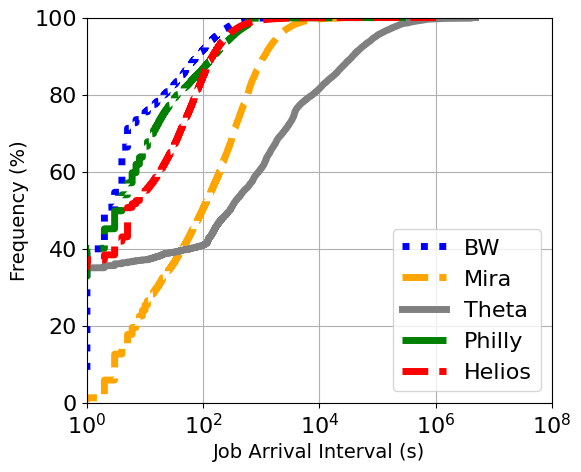

In [ ]:
def get_interval(a, peak=False):
    def get_time_of_day2(time):
        time = datetime.fromtimestamp(time)
        return (time.hour + (time.minute>30))%24
    if peak:
        z = a.apply(get_time_of_day2)
        b = a-a.shift(1)
        c = b[(z>=8) & (z<=17)]
        return c
    return a-a.shift(1)

plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(get_interval(bw_df["submit_time"]), 1000,"Job Arrival Interval (s)", linestyle=":", color="blue")
plot_cdf(get_interval(mira_df_2["submit_time"]), 1000,"Job Arrival Interval (s)", linestyle="--", color = "orange")
plot_cdf(get_interval(th_df["submit_time"]), 10009999,"Job Arrival Interval (s)", linestyle="solid", color =  "grey")
plot_cdf(get_interval(philly_df["submit_time"]), 1000,"Job Arrival Interval (s)", linestyle="-.", color="green")
plot_cdf(get_interval(hl_df["submit_time"]), 10009999,"Job Arrival Interval (s)", linestyle="--", color="red")
plt.rc('legend',fontsize=22)
plt.legend(["BW", "Mira", "Theta", "Philly","Helios"], fontsize = 16, loc="lower right")
plt.xscale("log")

# JGC - Job Waiting Time - CDF of Wait Time

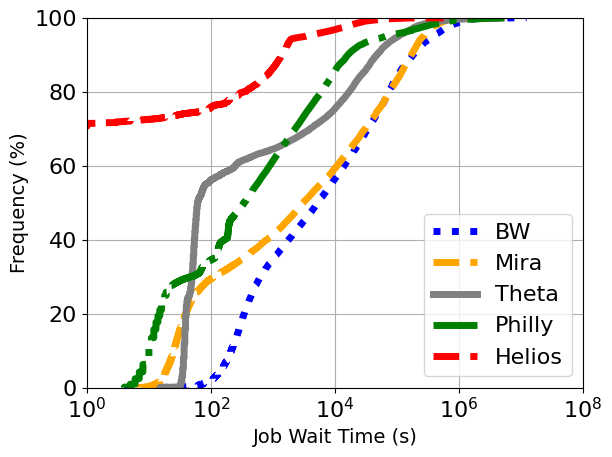

In [ ]:
plot_cdf(bw_df["wait_time"], 100000, "Job Wait Time (s)", linestyle=":", color = "blue")
plot_cdf(mira_df_2["wait_time"], 100000, "Job Wait Time (s)", linestyle="--", color = "orange")
plot_cdf(th_df["wait_time"], 100000, "Job Wait Time (s)", linestyle="solid", color = "grey")
plot_cdf(philly_df["wait_time"], 100000, "Job Wait Time (s)", linestyle="-.", color = "green")
plot_cdf(hl_df["wait_time"], 100000, "Job Wait Time (s)", linestyle="--", color = "red")
plt.legend(["BW", "Mira", "Theta", "Philly","Helios"], fontsize = 16, loc = "lower right")
plt.xscale("log")
plt.rc('legend',fontsize=23)

# JGC - Job Waiting Time - CDF of Turnaround Time

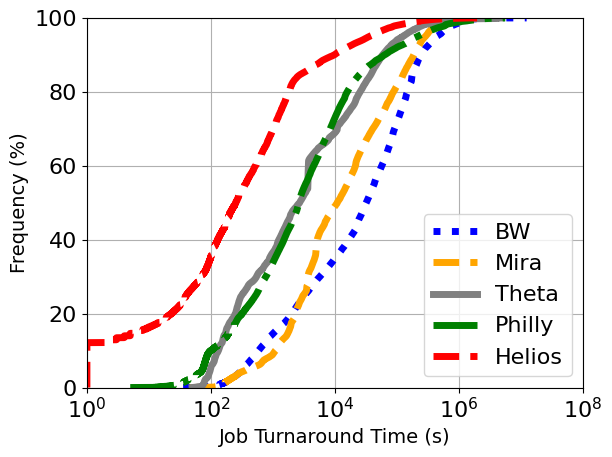

In [ ]:
plot_cdf(bw_df["wait_time"]+bw_df["run_time"], 100000, "Job Wait Time (s)", linestyle=":", color = "blue")
plot_cdf(mira_df_2["wait_time"]+mira_df_2["run_time"], 100000, "Job Wait Time (s)", linestyle="--", color = "orange")
plot_cdf(th_df["wait_time"]+th_df["run_time"], 100000, "Job Turnaround Time (s)", linestyle="solid", color="grey")
plot_cdf(philly_df["wait_time"]+philly_df["run_time"], 100000, "Job Wait Time (s)", linestyle="-.", color = "green")
plot_cdf(hl_df["wait_time"]+hl_df["run_time"], 100000, "Job Turnaround Time (s)", linestyle="--", color = "red")
plt.legend(["BW","Mira", "Theta", "Philly","Helios"], fontsize = 16, loc = "lower right")
plt.xscale("log")
plt.rc('legend',fontsize=23)

# JGC - Job Arrival Pattern - Daily Submit Pattern

In [ ]:
def get_time_of_day(time, timestamp=True):
    if timestamp:
        time = datetime.fromtimestamp(time)
    else:
        time = datetime.strptime(time, '%Y-%m-%d %H:%M:%S')
    return (time.hour + (time.minute>30))%24, datetime.strftime(time, '%Y-%m-%d')

def get_day_of_week(time):
    time = datetime.fromtimestamp(time)
    return time.isocalendar()[2], time.isocalendar()[1]

def plot_time_submit(submit_time, xlabel, ylabel="Number of Submitted Jobs", week=False, marker="o", color = "red"):
    if week == True:
        time, days = list(zip(*[get_time_of_day(i) for i in submit_time]))
        dd = Counter()
        for i in time:
            dd[i] += 1
        keys = sorted(dd.keys())
        n = len(set(days))
    else:
        days, weeks = list(zip(*[get_day_of_week(i) for i in submit_time]))
        dd = Counter()
        for i in days:
            dd[i] += 1
        keys = sorted(dd.keys())
        n = len(set(weeks))
    plt.plot(keys, [np.array(dd[j])/n for j in keys], marker=marker, linewidth=3, markersize=12, color = color)


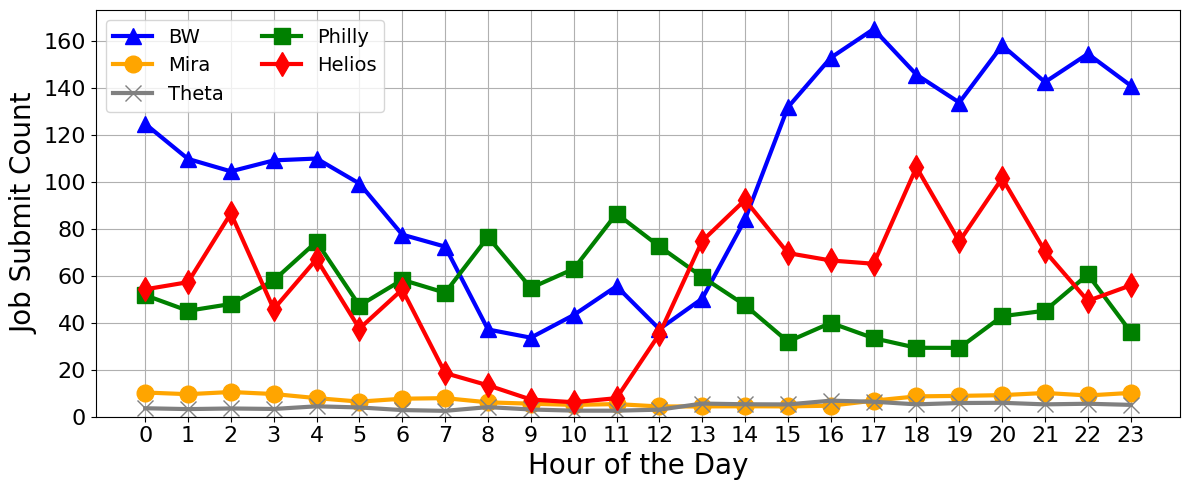

In [ ]:
plt.figure(figsize=(12,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plot_time_submit(bw_df["submit_time"], xlabel="Hour of the Day", week=True,marker="^", color = "blue")
plot_time_submit(mira_df_2["submit_time"], xlabel="Hour of the Day", week=True, marker="o", color = "orange")
plot_time_submit(th_df["submit_time"], xlabel="Hour of the Day", week=True, marker="x", color = "grey")
plot_time_submit(philly_df["submit_time"], xlabel="Hour of the Day", week=True, marker="s", color = "green")
plot_time_submit(hl_df["submit_time"], xlabel="Hour of the Day", week=True, marker="d", color = "red")
plt.xlabel("Hour of the Day", fontsize=20)
plt.ylabel("Job Submit Count", fontsize=20)
plt.ylim(bottom=0)
plt.tight_layout()
plt.grid(True)
plt.legend(["BW", "Mira", "Theta", "Philly","Helios"],  prop={'size': 14}, ncol = 2)
plt.xticks(range(0, 24, 1))
plt.rc('legend',fontsize=20)

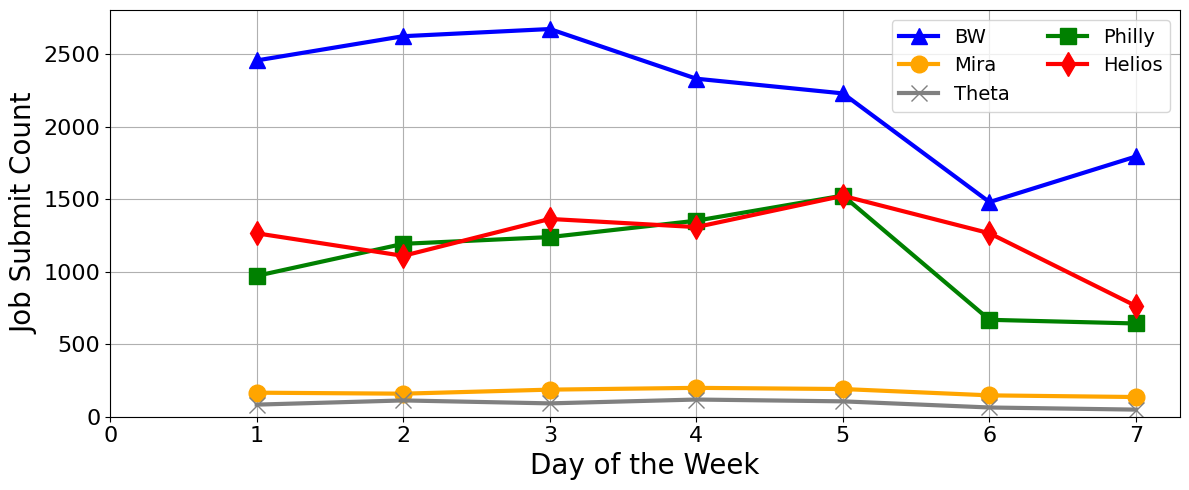

In [ ]:
plt.figure(figsize=(12,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plot_time_submit(bw_df["submit_time"], xlabel="Day of the Day", week=False,marker="^", color = "blue")
plot_time_submit(mira_df_2["submit_time"], xlabel="Day of the Day", week=False, marker="o", color = "orange")
plot_time_submit(th_df["submit_time"], xlabel="Day of the Day", week=False, marker="x", color = "grey")
plot_time_submit(philly_df["submit_time"], xlabel="Day of the Day", week=False, marker="s", color = "green")
plot_time_submit(hl_df["submit_time"], xlabel="Day of the Day", week=False, marker="d", color = "red")
plt.xlabel("Day of the Week", fontsize=20)
plt.ylabel("Job Submit Count", fontsize=20)
plt.ylim(bottom=0)
plt.tight_layout()
plt.grid(True)
plt.legend(["BW", "Mira", "Theta", "Philly","Helios"],  prop={'size': 14}, ncol = 2)
plt.xticks(range(0, 8, 1))
plt.rc('legend',fontsize=20)

# JGC - Job Run Time - Detailed Run Time Distribution

<ipython-input-234-55db84af399c>:35: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "dils". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  plt.bar(x_value+width/2, th, width,edgecolor='black', hatch="solid", color = "grey")


Text(0.5, 0, 'Job Run Time (s)')

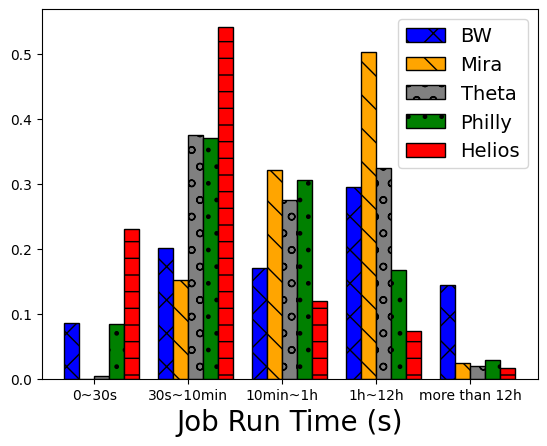

In [ ]:
def lt_xs(data, t1, t2):
    lt10min_jobs_num = len(data[data<t2][data>=t1])
    all_jobs_num = len(data)
    return lt10min_jobs_num/all_jobs_num

def lt_xs_all(t1, t2):
    res = []
    res.append(lt_xs(bw_df["run_time"], t1, t2))
    res.append(lt_xs(mira_df_2["run_time"], t1, t2))
    res.append(lt_xs(th_df["run_time"], t1, t2))
    res.append(lt_xs(philly_df["run_time"], t1, t2))
    res.append(lt_xs(hl_df["run_time"], t1, t2))
    return res

x = [0, 30, 600, 3600, 12*3600, 100000]
x_value = np.array([1, 2, 3, 4, 5])
labels = ['0~30s', '30s~10min', '10min~1h', '1h~12h', "more than 12h"]
bw = []
mr = []
th = []
ply = []
hl = []

width = 0.16
for i in range(1, len(x)):
    res = lt_xs_all(x[i-1], x[i])
    bw.append(res[0])
    mr.append(res[1])
    th.append(res[2])
    ply.append(res[3])
    hl.append(res[4])

plt.bar(x_value-3*width/2, bw, width, edgecolor='black', hatch="x", color="blue")
plt.bar(x_value-width/2, mr, width,edgecolor='black', hatch="\\", color = "orange")
plt.bar(x_value+width/2, th, width,edgecolor='black', hatch="solid", color = "grey")
plt.bar(x_value+3*width/2, ply, width,edgecolor='black', hatch=".", color = "green")
plt.bar(x_value+5*width/2, hl, width,edgecolor='black', hatch="-", color = "red")

plt.xticks(x_value, labels)
plt.legend(["BW", "Mira",  "Theta", "Philly","Helios"], prop={'size': 14})
plt.xlabel("Job Run Time (s)", fontsize=20)

In [ ]:
def plot_runtime_predict2(a):
    datasets = ["LR","XGboost", "MLP", "Torbit", "Last2"]
    num_datasets = len(datasets)

    performance_c_A = np.array([a[i] for i in range(0, len(a), 4)])*100
    performance_c_B = np.array([a[i] for i in range(1, len(a), 4)])*100
    performance_c_C = np.array([a[i] for i in range(2, len(a), 4)])*100
    performance_c_D = np.array([a[i] for i in range(3, len(a), 4)])*100
    bar_width = 0.2
    x = np.arange(num_datasets)
    fig, ax = plt.subplots()
    hatches= ["-", ".", "x", "-"]
    colors=['#1f77b4', '#ff7f0e', '#2ca02c']
    for i in range(num_datasets):
        ax.bar(x[i] - bar_width, performance_c_A[i], bar_width, color='#1f77b4', hatch='-', edgecolor="black")
        ax.bar(x[i], performance_c_B[i], bar_width, color='#ff7f0e', hatch='.',edgecolor="black")
        ax.bar(x[i] + bar_width, performance_c_C[i], bar_width, color='#2ca02c',hatch='xx', edgecolor="black")
        ax.bar(x[i] + 2 * bar_width, performance_c_D[i], bar_width, color='#d62728',hatch='o', edgecolor="black")

    ax.set_ylabel('Average Accuracy (%)', fontsize=20)
    ax.set_xticks(x-bar_width/2)
    ax.set_xticklabels(datasets, fontsize=20)
    ax.set_ylim([0, 100])

    plt.show()

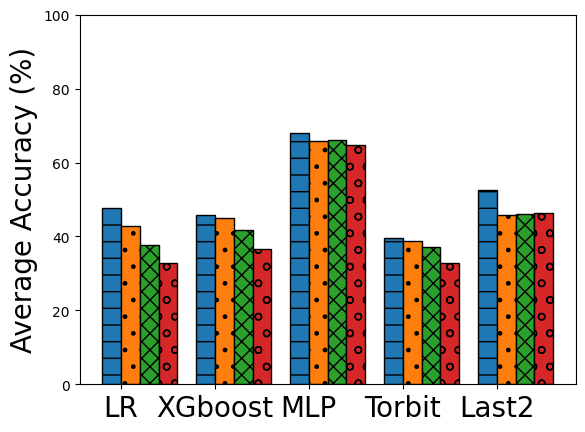

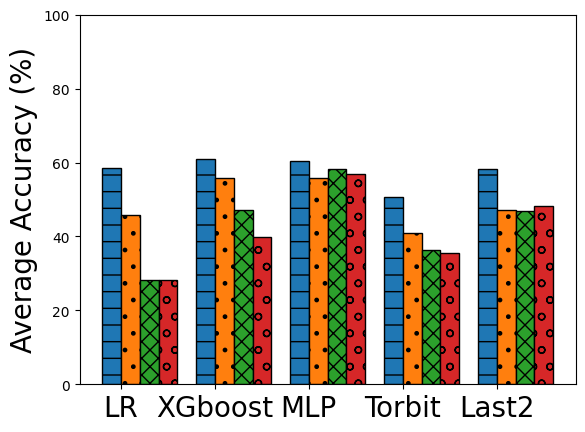

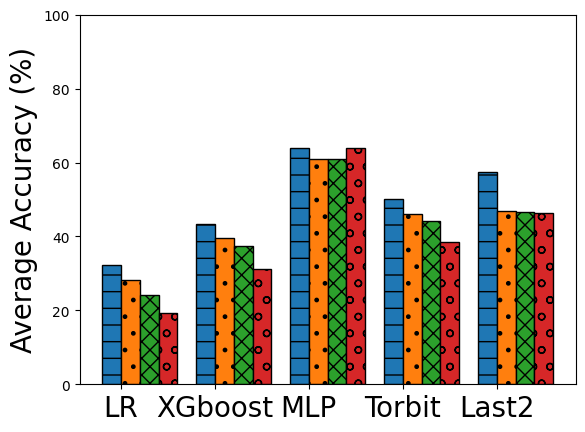

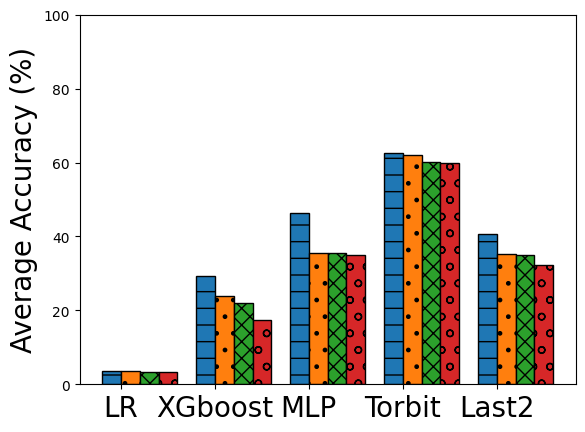

In [ ]:
plot_runtime_predict2([0.475761851,0.428550577,0.375679138,0.328954411,0.456770301,0.450688464,0.41787898,0.366110381,0.679219579,0.658022349,0.66176876,0.647237224,0.396324949,0.387940122,0.371932727,0.327073096,0.525438298,0.456794036,0.461619796,0.463208939])
plot_runtime_predict2([0.58410319,0.456858986,0.282900471,0.282377549,0.609377724,0.557608506,0.470454942,0.398989019,0.605194352,0.557608506,0.581488583,0.568066934,0.507756667,0.408924525,0.3643019,0.356458079,0.583405961,0.470322216,0.467844943,0.482482134])
plot_runtime_predict2([0.323222589,0.282362011,0.242441034,0.192208543,0.433035392,0.396728263,0.372780495,0.310815043,0.640325728,0.608475679,0.610692172,0.639482497,0.500421616,0.461825716,0.442696413,0.384392994,0.574505505,0.469983146,0.465002904,0.464716795])
plot_runtime_predict2([0.036475578,0.034634128,0.033090287,0.032922882,0.294129683,0.238960604,0.221066925,0.174509877,0.462724601,0.354243555,0.353948886,0.350396191,0.624865146,0.619191994,0.601670325,0.598192032,0.405546669,0.352844536,0.349689227,0.321918827])

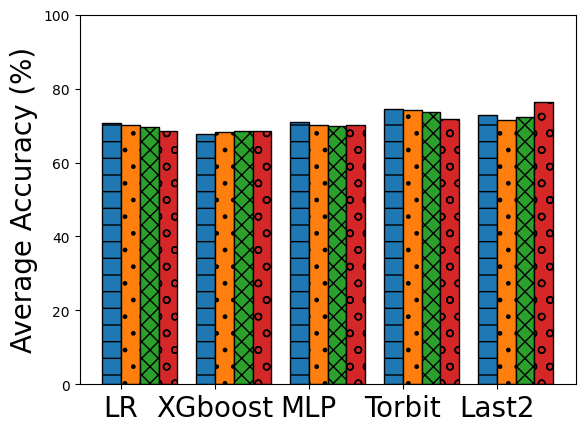

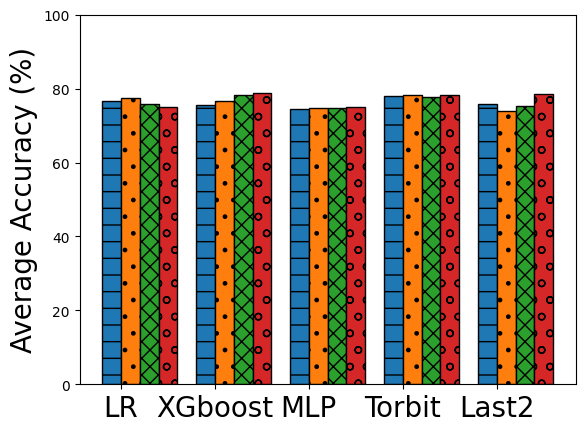

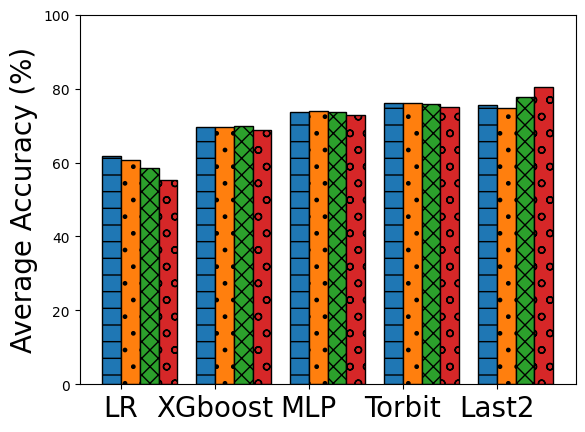

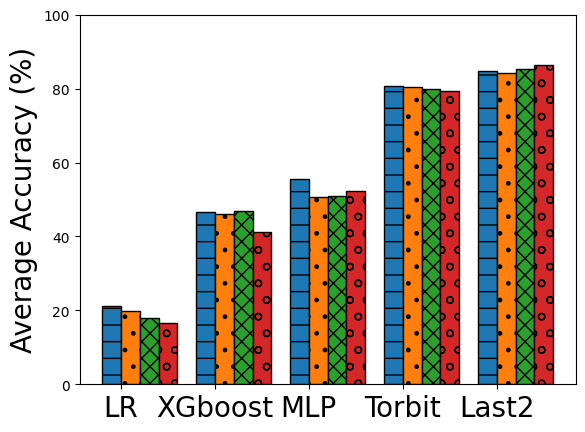

In [ ]:
plot_runtime_predict2([0.707789829,0.701651364,0.697189021,0.684670447,0.676492771,0.683550948,0.685515268,0.686208826,0.710644345,0.700744912,0.699970677,0.702321837,0.743519496,0.742906733,0.736953198,0.719000961,0.727657002,0.714137799,0.722348809,0.764528979])
plot_runtime_predict2([0.76563103,0.7737006,0.757159239,0.749824339,0.754715154,0.765376185,0.784014376,0.788173985,0.746123539,0.748363602,0.747025052,0.750222168,0.779226215,0.782743322,0.77750738,0.782944346,0.757565785,0.740371105,0.753055682,0.784958189])
plot_runtime_predict2([0.616333934,0.606280709,0.584241939,0.553080712,0.696262076,0.696612946,0.697934536,0.688542366,0.736126672,0.740203895,0.737497447,0.729599379,0.762218207,0.761412308,0.758063093,0.750342698,0.75697418,0.74663953,0.778020557,0.804005823])
plot_runtime_predict2([0.213024082,0.197649389,0.178437632,0.166298629,0.466546797,0.459658392,0.46889938,0.412183114,0.554877823,0.505894583,0.508975117,0.522433906,0.807604184,0.805638105,0.797798521,0.79222452,0.848444362,0.843058217,0.852907174,0.865136978])

In [ ]:
def plot_size_util(data, a, b, col="cpu_num"):
    data = data.copy()
    data["core_hour"] = data.apply(lambda row: row[col]*row["run_time"], axis=1)
    data = data[data[col]!=0]
    data_a = data[data[col]<=a]
    data_b = data[(data[col]>a) & (data[col]<=b)]
    data_c = data[data[col]>b]
    return data_a["core_hour"], data_b["core_hour"], data_c["core_hour"]

def plot_runtime_util(data, a, b, col="cpu_num"):
    data = data.copy()
    data["core_hour"] = data.apply(lambda row: row[col]*row["run_time"], axis=1)
    data = data[data[col]!=0]
    data_a = data[data["run_time"]<=a]
    data_b = data[(data["run_time"]>a) & (data["run_time"]<=b)]
    data_c = data[data["run_time"]>b]
    return data_a["core_hour"], data_b["core_hour"], data_c["core_hour"]

In [ ]:
small_bw, middle_bw, large_bw = plot_size_util(bw_df, 22636*32//10, 3*22636*32//10)
small_mira, middle_mira, large_mira  = plot_size_util(mira_df_2, 49152*16//10, 3*49152*16//10)
small_sc, middle_sc, large_sc = plot_size_util(sc_df, 32000//10, 3*32000//10)
small_philly, middle_philly, large_philly = plot_size_util(philly_df, 1, 8, col="gpu_num")
small_hl, middle_hl, large_hl = plot_size_util(hl_df, 1, 8, col="gpu_num")
small_th, middle_th, large_th = plot_size_util(th_df, 281088//10, 3*281088//10)
small_th_gpu, middle_th_gpu, large_th_gpu = plot_size_util(th_gpu_df, 1, 8, col="gpu_num")


short_bw, medium_bw, long_bw = plot_runtime_util(bw_df, 3600, 3600*24)
short_bw, medium_bw, long_bw = plot_runtime_util(bw_df, 3600, 3600*24)
short_mira, medium_mira, long_mira = plot_runtime_util(mira_df_2, 3600, 3600*24)
short_sc, medium_sc, long_sc = plot_runtime_util(sc_df, 3600, 3600*24)
short_philly, medium_philly, long_philly = plot_runtime_util(philly_df, 3600, 3600*24, col="gpu_num")
short_hl, medium_hl, long_hl = plot_runtime_util(hl_df, 3600, 3600*24, col="gpu_num")
short_th, medium_th, long_th = plot_runtime_util(th_df, 3600, 3600*24)
th_gpu_df["core_hour"] = th_gpu_df["gpu_num"] * th_gpu_df["run_time"]
short_th_gpu, medium_th_gpu, long_th_gpu = plot_runtime_util(th_gpu_df, 3600, 3600*24, col="gpu_num")


In [ ]:
small_bw

33        1410711552
34        1395032064
35         232923136
36          21569536
37            458752
             ...    
358559          1440
358562        307200
358568        359424
358571          1560
358572          1248
Name: core_hour, Length: 278519, dtype: int64

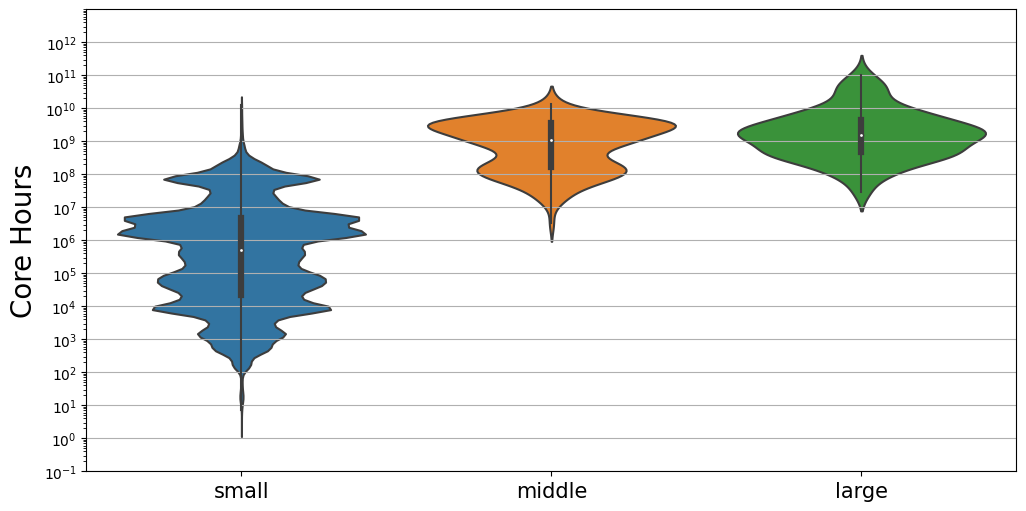

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# a, b, c -> short, medium, long and small, middle, large -> based on what you are passing
def plot_size_distribution_violin(a, b, c):
    plt.style.use("default")

    small_data = np.log10(np.array(a) + 1)
    middle_data = np.log10(np.array(b) + 1)
    large_data = np.log10(np.array(c) + 1)

    fig, ax = plt.subplots(figsize=(12, 6))

    all_data = np.concatenate([small_data, middle_data, large_data])
    labels = ['Small'] * len(small_data) + ['Middle'] * len(middle_data) + ['Large'] * len(large_data)

    sns.violinplot(x = labels, y= all_data, ax=ax, scale="width")

    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
    ymin, ymax = ax.get_ylim()
    tick_range = np.arange(np.floor(ymin), ymax)
    ax.yaxis.set_ticks(tick_range)
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
    ax.yaxis.grid(True)
    ax.set_xticks([y for y in range(3)])
    ax.set_xticklabels(["small", "middle", "large"], fontsize=15)
    ax.set_ylabel('Core Hours', fontsize=20)

    plt.show()

plot_size_distribution_violin(small_bw, middle_bw, large_bw)

In [ ]:
def plot_size_util(data, col="cpu_num"):
    data = data.copy()
    data["core_hour"] = data.apply(lambda row: row[col]*row["run_time"], axis=1)
    return data["core_hour"]

In [ ]:
bw_core = plot_size_util(bw_df)
mr_core = plot_size_util(mira_df_2)

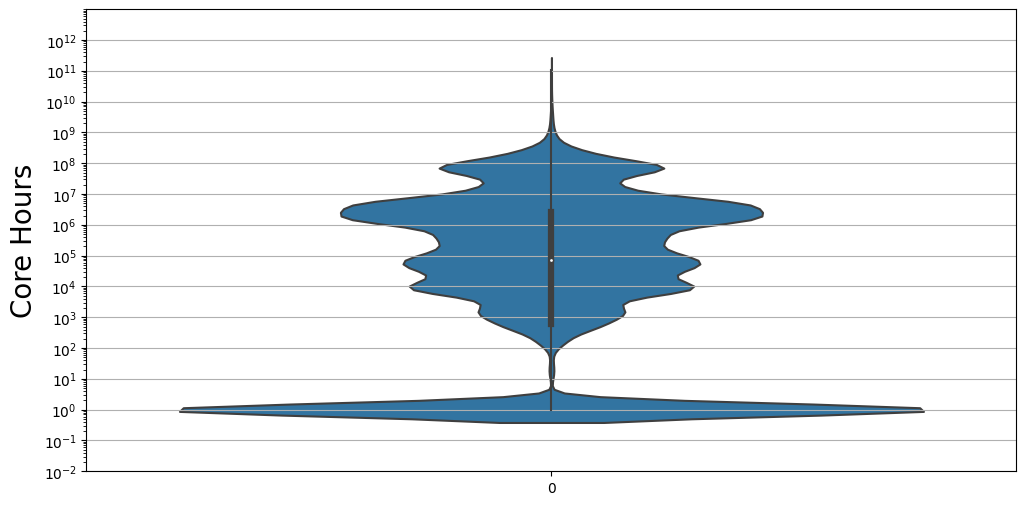

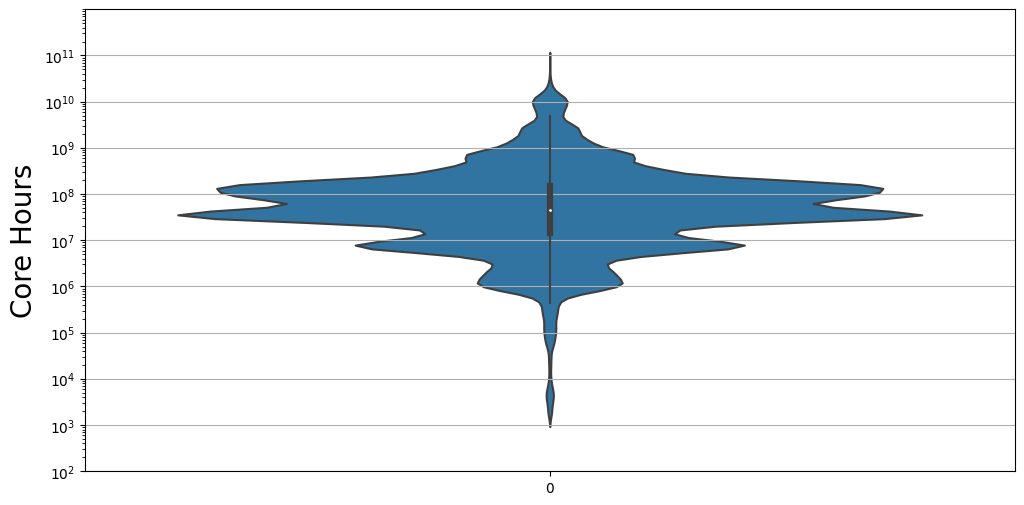

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# a, b, c -> short, medium, long and small, middle, large -> based on what you are passing
def plot_size_distribution_violin(data):
    plt.style.use("default")

    data = np.log10(np.array(data) + 1)

    fig, ax = plt.subplots(figsize=(12, 6))

    sns.violinplot(data = data, ax=ax, scale="width")

    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
    ymin, ymax = ax.get_ylim()
    tick_range = np.arange(np.floor(ymin), ymax)
    ax.yaxis.set_ticks(tick_range)
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
    ax.yaxis.grid(True)
    # ax.set_xticks([y for y in range(3)])
    # ax.set_xticklabels(["small", "middle", "large"], fontsize=15)
    ax.set_ylabel('Core Hours', fontsize=20)

    plt.show()

plot_size_distribution_violin(bw_core)
plot_size_distribution_violin(mr_core)
